This notebook is pending translation for the most part.

In [1]:
!pip install numpy scipy
!pip install ttml

# Source codes

In [2]:
import inspect
from ttml import tt_cross  # Make sure ttml is installed

# Get the functions from the tt_cross module
tt_cross_dmrg = tt_cross.tt_cross_dmrg
tt_cross_regular = tt_cross.tt_cross_regular

# Get the source code of tt_cross_dmrg
print("Source code of tt_cross_dmrg:")
print(inspect.getsource(tt_cross_dmrg))

print("\n" + "="*50 + "\n")  # Separator

# Get the source code of tt_cross_regular
print("Source code of tt_cross_regular:")
print(inspect.getsource(tt_cross_regular))

Source code of tt_cross_dmrg:
def tt_cross_dmrg(
    tt, index_fun, tol=1e-3, max_its=10, verbose=False, inplace=True
):
    """
    Implements DMRG TT-Cross algorithm

    Recovers a tensor-train from a function mapping indices to numbers. The
    function `index_fun` should accept arbitrary multidimensional arrays of
    indices, with last axis the same shape as the number of dimensions. You can
    use `index_function_wrapper` to convert a function to this form.

    Parameters
    ----------
    tt: TensorTrain
    index_fun: function
    tol: float (default: 1e-3)
        Tolerance for convergence. The algorithm is stopped if after a half-
        sweep the maximum difference in the half-sweep between any cross-sampled
        supercore and supercore of the TT is less than `tol`.
    max_its: int (default: 5)
    verbose: bool (default: False)
    inplace: bool (default: True)

    Returns
    -------
    tt: TensorTrain
    """
    if not inplace:
        tt = tt.copy()
    tt, P

In [3]:
import inspect
from ttml import tt_cross  # Make sure ttml is installed

# Get the functions from the tt_cross module
_sweep_step_dmrg = tt_cross._sweep_step_dmrg
_sweep_step_regular = tt_cross._sweep_step_regular

# Get the source code of _sweep_step_dmrg
print("Source code of _sweep_step_dmrg:")
print(inspect.getsource(_sweep_step_dmrg))

print("\n" + "="*50 + "\n")  # Separator

# Get the source code of _sweep_step_regular
print("Source code of _sweep_step_regular:")
print(inspect.getsource(_sweep_step_regular))

Source code of _sweep_step_dmrg:
def _sweep_step_dmrg(
    i,
    direction,
    tt,
    index_array,
    index_fun,
    Pmats,
    rank_kick=0,
    verbose=False,
    cache=None,
):
    """
    Do one step of the DMRG TT-cross algorithm, sweeping in a specified
    direction.

    Parameters
    ----------
    i : int
        Left index of the supercore
    direction : str
        Either "LR" or "RL", corresponding to a sweep in the left-to-right
        and right-to-left direcition respectively
    tt : TensorTrain
        TensorTrain to be modified
    index_array : list[np.ndarray]
        list of left_indices and right_indices. At step `i`, `index_array[i+1]`
        will be modified
    index_fun : function
        Function mapping indices to function values to be used for fitting
    Pmats : list[np.ndarray]
        The list of matrices to be used to compute maxvol at step i. At step
        `i`, `Pmats[i+1]` will be modified.
    rank_kick : int (default: 0)
        Increase ra

In [4]:
import inspect
from ttml.tt_cross import _test_accuracy_tt

# Get the source code of _test_accuracy_tt
source_code = inspect.getsource(_test_accuracy_tt)

# Print the source code
print(source_code)

def _test_accuracy_tt(tt, cache, max_num_samples=1000):
    "Test MSE regression error on samples to measure convergence"
    N = len(cache["func_vals"])
    num_samples = min(max_num_samples, N)
    subset = np.random.choice(N, size=num_samples, replace=False)
    y_pred = tt.gather(cache["inds"][subset])
    y_true = cache["func_vals"][subset]
    return np.mean((y_pred - y_true) ** 2)



In [5]:
import inspect
from ttml.tensor_train import TensorTrain
import numpy as np

# Get the source code of tt.gather
source_code = inspect.getsource(tt.gather)

# Print the source code
print(source_code)

# Create an initial TT tensor
d = 10
n = 50
shape = [n + 1] * d
initial_rank = 3
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n + 1, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n + 1, 1))
    else:
        cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
tt_initial = TensorTrain(cores)

# Run tt_cross_regular
tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=1e-3,
    max_its=2,
    verbose=True,
    inplace=True
)

# Check the backend
print(f"Backend configured in tt_approx: {tt_approx.backend}")

NameError: name 'tt' is not defined

In [ ]:
# Crear un tensor TT inicial
d = 10
n = 50
shape = [n + 1] * d
initial_rank = 3
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n + 1, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n + 1, 1))
    else:
        cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar tt_cross_regular
tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=1e-3,
    max_its=2,
    verbose=True,
    inplace=True
)

# Verificar el backend
print(f"Backend configurado en tt_approx: {tt_approx.backend}")

Sweep 0, direction LR. 
Last error: 9.0212e-02
Sweep 1, direction RL. 
Last error: 3.5916e-02
Backend configurado en tt_approx: numpy


In [6]:
import inspect
from ttml.tensor_train import TensorTrain
import numpy as np

# Create a sample TensorTrain (as in your code)
d = 10
n = 50
initial_rank = 3
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n + 1, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n + 1, 1))
    else:
        cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
tt = TensorTrain(cores)

# Check the backend
print(f"Backend: {tt.backend}")

# Get the source code of fast_gather
source_code = inspect.getsource(tt.fast_gather)

# Print the source code
print("Source code of fast_gather:")
print(source_code)

Backend: numpy
Source code of fast_gather:
    def fast_gather(self, idx):
        """Faster version of standard gather. Only works with numpy backend"""
        idx = idx.T
        N = idx.shape[1]
        result = np.take(self[0].reshape(self[0].shape[1:]), idx[0], axis=0)
        for i in range(1, self.order):
            r = self[i].shape[2]
            next_step = np.zeros((N, r))
            for j in range(self.dims[i]):
                idx_mask = np.where(idx[i] == j)
                mat = self[i][:, j, :]
                next_step[idx_mask] = result[idx_mask] @ mat
            result = next_step
        return result.reshape(-1)



In [7]:
import numpy as np
from ttml.tensor_train import TensorTrain

# Create a small TensorTrain for testing
d = 3  # 3 dimensions
n = 4  # Size of each dimension
ranks = [1, 2, 1]  # Ranks: r_0 = 1, r_1 = 2, r_2 = 1
cores = [
    np.random.rand(1, n, 2),  # Core 0: (1, 4, 2)
    np.random.rand(2, n, 1),  # Core 1: (2, 4, 1)
    np.random.rand(1, n, 1)   # Core 2: (1, 4, 1)
]
tt = TensorTrain(cores)

# Check the backend
print(f"Backend: {tt.backend}")

# Define test indices
indices = np.array([
    [0, 1, 2],
    [2, 3, 0],
    [1, 1, 1]
])  # Shape: (3, 3)

# Use tt.gather (which internally calls fast_gather with backend="numpy")
values_gather = tt.gather(indices)
print("Values using tt.gather (fast_gather):", values_gather)

# Define evaluate_tt
def evaluate_tt(tt, indices):
    d = len(tt.dims)
    n_samples = indices.shape[0]
    result = np.zeros(n_samples)
    for i in range(n_samples):
        idx = indices[i]
        value = np.ones(1)
        for k in range(d):
            core = tt.cores[k]
            r_prev, n_k, r_next = core.shape
            idx_k = idx[k]
            if idx_k >= n_k:
                raise ValueError(f"Index {idx_k} out of bounds [0, {n_k-1}] in dimension {k}")
            matrix = core[:, idx_k, :]
            value = np.dot(value, matrix)
        result[i] = value[0]
    return result

# Use evaluate_tt
values_evaluate = evaluate_tt(tt, indices)
print("Values using evaluate_tt:", values_evaluate)

# Compare results
difference = np.abs(values_gather - values_evaluate)
print("Absolute difference between both methods:", difference)
print("Are they equivalent (difference < 1e-10)?", np.all(difference < 1e-10))

Backend: numpy
Values using tt.gather (fast_gather): [0.05103094 0.54050152 0.19845501]
Values using evaluate_tt: [0.05103094 0.54050152 0.19845501]
Absolute difference between both methods: [0. 0. 0.]
Are they equivalent (difference < 1e-10)? True




---



# Function evaluate_tt

Esta función en principio no hace falta, ya que podemos usar la versión implementada específica de ttml. La diferencia es que tt.gather está vectorizado y es más rápido, y evaluate_tt tiene bucles explícitos.

In [8]:
# Función para evaluar un TensorTrain en índices discretos (0 a n)
def evaluate_tt(tt, indices):
    d = len(tt.dims)  # Número de dimensiones
    n_samples = indices.shape[0]
    result = np.zeros(n_samples)

    for i in range(n_samples):
        idx = indices[i]
        value = np.ones(1)  # Comenzar con 1 (rango inicial r_0 = 1)

        for k in range(d):
            core = tt.cores[k]
            r_prev, n_k, r_next = core.shape
            idx_k = idx[k]

            if idx_k >= n_k:
                raise ValueError(f"Índice {idx_k} fuera del rango [0, {n_k-1}] en dimensión {k}")

            matrix = core[:, idx_k, :]
            value = np.dot(value, matrix)

        result[i] = value[0]

    return result



---



# First try

In [ ]:
from ttml.tt_cross import estimator_to_tt_cross
import numpy as np

def f(x):
    return np.sin(np.sum(x, axis=1))

# Same thresholds for every feature: [0,0.2,0.4,0.6,0.8]
thresholds = [np.linspace(0, 1, 11)] * 5

tt = estimator_to_tt_cross(f, thresholds)
tt.gather(np.array([[2, 2, 2, 2, 2]])) - np.sin(1)

array([-1.11022302e-16])

In [ ]:
tt2 = estimator_to_tt_cross(f, thresholds, max_rank=2)
tt2

<TensorTrain of order 5 with outer dimensions (11, 11, 11, 11, 11), TT-rank (2, 2, 2, 2), and orthogonalized at mode 4>

We implemented two versions of the TT-cross approximation algorithm. A ‘dmrg’ and a ‘regular’ version. The default is the ‘dmrg’ version, and it optimizes the TT one core at a time in alternating left-to-right and right-to-left sweeps. The ‘dmrg’ version optimizes two cores at the same time. The latter approach is more costly numerically speaking, but has the potential ability to estimate the rank of the underlying TT automatically (although this is not an implemented feature). The DMRG algorithm also converges faster, and tends to result in a better final test error. Therefore the DMRG is the default, despite the fact that it is slower. We can control which version is used through the method kwarg:

ttml.tt_cross.tt_cross_dmrg(tt, index_fun, tol=0.001, max_its=10, verbose=False, inplace=True)[source]
Implements DMRG TT-Cross algorithm

Recovers a tensor-train from a function mapping indices to numbers. The function index_fun should accept arbitrary multidimensional arrays of indices, with last axis the same shape as the number of dimensions. You can use index_function_wrapper to convert a function to this form.

Parameters
tt (TensorTrain) –

index_fun (function) –

tol (float (default: 1e-3)) – Tolerance for convergence. The algorithm is stopped if after a half- sweep the maximum difference in the half-sweep between any cross-sampled supercore and supercore of the TT is less than tol.

max_its (int (default: 5)) –

verbose (bool (default: False)) –

inplace (bool (default: True)) –

Returns
tt

Return type
TensorTrain

La función que vamos a usar para mapear índices a números es:
$$f(i_0,\dots,i_9)=e^{-0.001\cdot i_0}\cdot \sin (0.01\cdot i_1)\cdot \cos (0.02\cdot i_2)\cdot \frac{i_3}{1000}+10^{-6}\cdot (\sum_{k=4}^9 i_k^2) $$

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg
from ttml.tt_cross import index_function_wrapper

# Definir la función compleja
def complex_index_fun(indices):
    ind = indices.astype(float)
    result = (np.exp(-0.001 * ind[:, 0]) * np.sin(ind[:, 1] * 0.01) *
              np.cos(ind[:, 2] * 0.02) * ind[:, 3] / 1000 +
              np.sum(ind[:, 4:] ** 2, axis=1) * 1e-6)
    return result


complex_index_fun_wrapped = index_function_wrapper(complex_index_fun)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones
n = 1000  # 1000 nodos por dimensión
shape = [n] * d  # Forma del tensor: (1000, 1000, ..., 1000)

# Crear un tensor TT inicial con rangos más altos
initial_rank = 5  # Aumentamos el rango inicial para mayor flexibilidad
cores = []
for k in range(d):
    if k == 0:
        # Primer núcleo: (1, n, r)
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        # Último núcleo: (r, n, 1)
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        # Núcleos intermedios: (r, n, r)
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-5  # Tolerancia de convergencia
max_its = 5  # Número máximo de iteraciones
verbose = True  # Mostrar progreso

tt_approx = tt_cross_dmrg(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

Sweep 0, direction LR. max_local_error=2.9145e+03
Sweep 1, direction RL. max_local_error=8.0478e-15


TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg

# Función para evaluar un TensorTrain en índices específicos
def evaluate_tt(tt, indices):
    """
    Evalúa un TensorTrain en un conjunto de índices multidimensionales.
    Args:
        tt: TensorTrain object
        indices: Array de forma (n_samples, d) con índices
    Returns:
        Array de forma (n_samples,) con los valores evaluados
    """
    n_samples = indices.shape[0]
    values = np.zeros(n_samples)
    for s in range(n_samples):
        idx = indices[s]
        # Inicializar con el primer núcleo
        result = tt.cores[0][0, idx[0], :]  # (r_1,)
        # Multiplicar por cada núcleo subsiguiente
        for k in range(1, len(tt.cores)):
            core = tt.cores[k]  # (r_k, n_k, r_{k+1})
            result = result @ core[:, idx[k], :]  # (r_k,) @ (r_k, r_{k+1}) -> (r_{k+1},)
        values[s] = result[0]  # Último resultado es escalar (r_d = 1)
    return values

# Verificar la aproximación
num_samples = 20
random_indices = np.random.randint(0, n, size=(num_samples, d))
exact_values = complex_index_fun(random_indices)
approx_values = evaluate_tt(tt_approx, random_indices)

# Mostrar resultados
print("\nComparación de valores exactos vs. aproximados:")
for i in range(num_samples):
    print(f"Índice: {random_indices[i]}")
    print(f"Valor exacto: {exact_values[i]:.6f}, Valor aproximado: {approx_values[i]:.6f}")
    print(f"Diferencia absoluta: {abs(exact_values[i] - approx_values[i]):.6f}\n")


Comparación de valores exactos vs. aproximados:
Índice: [367 706 891 579 459 150 470 768 714 805]
Valor exacto: 2.346601, Valor aproximado: 2.346601
Diferencia absoluta: 0.000000

Índice: [504 760 883 861 413 543 556 507 752 338]
Valor exacto: 1.898671, Valor aproximado: 1.898671
Diferencia absoluta: 0.000000

Índice: [220 372 900 388 625 273 680 103 677 504]
Valor exacto: 1.538104, Valor aproximado: 1.538104
Diferencia absoluta: 0.000000

Índice: [257 839 148 679 952 499 540 889 737 336]
Valor exacto: 2.449246, Valor aproximado: 2.449246
Diferencia absoluta: 0.000000

Índice: [687 354 247 742 693 260 134 254 538 469]
Valor exacto: 1.107048, Valor aproximado: 1.107048
Diferencia absoluta: 0.000000

Índice: [246   0   3  70 328 108 586 255 776 888]
Valor exacto: 1.918389, Valor aproximado: 1.918389
Diferencia absoluta: 0.000000

Índice: [572 178 668 789 775 981 856 475 869 392]
Valor exacto: 3.735641, Valor aproximado: 3.735641
Diferencia absoluta: 0.000000

Índice: [586 618 864 459 74

In [ ]:
# Mostrar información del tensor aproximado
print("Rangos del tensor aproximado:", tt_approx.tt_rank)
print("Forma de cada núcleo (core):")
for k, core in enumerate(tt_approx.cores):
    print(f"Core {k}: {core.shape}")

Rangos del tensor aproximado: (5, 5, 5, 5, 5, 5, 5, 5, 5)
Forma de cada núcleo (core):
Core 0: (1, 1000, 5)
Core 1: (5, 1000, 5)
Core 2: (5, 1000, 5)
Core 3: (5, 1000, 5)
Core 4: (5, 1000, 5)
Core 5: (5, 1000, 5)
Core 6: (5, 1000, 5)
Core 7: (5, 1000, 5)
Core 8: (5, 1000, 5)
Core 9: (5, 1000, 1)


Como vemos, el atributo 'tt_rank' devuelve solamente los rangos intermedios de los núcleos. Si devolviera todos los rangos (los de los extremos siempre son 1) tendría que ser un vector de 11 elementos, no 9.

In [ ]:
# 4. Intentar acceder a los rangos manualmente a partir de los núcleos
print("\nRangos calculados manualmente a partir de los núcleos:")
manual_ranks = [1]  # Primer rango siempre es 1
for core in tt_approx.cores:
    manual_ranks.append(core.shape[2])  # Rango derecho de cada núcleo
print("Rangos manuales:", manual_ranks)


Rangos calculados manualmente a partir de los núcleos:
Rangos manuales: [1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1]




---



Otra prueba con los rangos iniciales más pequeños. Quizá la función es demasiado simple?

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg
from ttml.tt_cross import index_function_wrapper

# Definir una clase contadora para rastrear los elementos evaluados
class CountingWrapper:
    def __init__(self, func):
        self.func = func
        self.total_elements = 0  # Contador de elementos individuales evaluados

    def __call__(self, indices):
        num_indices = indices.shape[0]  # Número de filas en 'indices'
        self.total_elements += num_indices  # Sumar la cantidad de evaluaciones
        return self.func(indices)

    def get_count(self):
        return self.total_elements


# Definir la función compleja
def complex_index_fun(indices):
    ind = indices.astype(float)
    print(f"Evaluando {indices.shape[0]} índices en un solo llamado")
    result = (np.exp(-0.001 * ind[:, 0]) * np.sin(ind[:, 1] * 0.01) *
              np.cos(ind[:, 2] * 0.02) * ind[:, 3] / 1000 +
              np.sum(ind[:, 4:] ** 2, axis=1) * 1e-6)
    return result

# Envolver la función con index_function_wrapper y luego con el contador
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun)
counting_fun = CountingWrapper(complex_index_fun_wrapped)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones
n = 1000  # 1000 nodos por dimensión
shape = [n] * d  # Forma del tensor: (1000, 1000, ..., 1000)

# Crear un tensor TT inicial con rangos más altos
initial_rank = 2
cores = []
for k in range(d):
    if k == 0:
        # Primer núcleo: (1, n, r)
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        # Último núcleo: (r, n, 1)
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        # Núcleos intermedios: (r, n, r)
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-7  # Tolerancia de convergencia
max_its = 15  # Número máximo de iteraciones
verbose = True  # Mostrar progreso

tt_approx = tt_cross_dmrg(
    tt=tt_initial,
    index_fun=counting_fun,  # Usar la versión envuelta con contador
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de elementos individuales evaluados: {counting_fun.get_count()}")

Evaluando 2000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 2000000 índices en un solo llamado
Sweep 0, direction LR. max_local_error=1.9599e+00
Evaluando 2000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 4000000 índices en un solo llamado
Evaluando 2000000 índices en un solo llamado
Sweep 1, direction RL. max_local_error=1.7603e-14

Número total de elementos individuales evaluados: 34


En esta interpolación de arriba se evalúan $64\times 10^6$ índices de $10^{30}$. Esto implica un ratio de $6,4\times 10^{-23}$, que es muy bueno.



---



# Second try

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg
from ttml.tt_cross import index_function_wrapper

# Definir una clase contadora para rastrear los elementos evaluados
class CountingWrapper:
    def __init__(self, func):
        self.func = func
        self.total_indices = 0  # Contador total de índices evaluados

    def __call__(self, indices):
        num_indices = indices.shape[0]  # Número de filas (multiíndices evaluados)
        self.total_indices += num_indices  # Acumular el total
        return self.func(indices)

    def get_total_count(self):
        return self.total_indices


# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations


# Función de evaluación real
def complex_index_fun(indices):
    ind = indices.astype(float)
    result = (np.exp(-0.001 * ind[:, 0]) * np.sin(ind[:, 1] * 0.01) *
              np.cos(ind[:, 2] * 0.02) * ind[:, 3] / 1000 +
              np.sum(ind[:, 4:] ** 2, axis=1) * 1e-6)
    return result


# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones
n = 400  # 400 nodos por dimensión
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 2
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-2
max_its = 15
verbose = True

tt_approx = tt_cross_dmrg(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

Evaluando 320000 índices en este llamado. Total acumulado: 320000
Evaluando 640000 índices en este llamado. Total acumulado: 960000
Evaluando 640000 índices en este llamado. Total acumulado: 1600000
Evaluando 640000 índices en este llamado. Total acumulado: 2240000
Evaluando 640000 índices en este llamado. Total acumulado: 2880000
Evaluando 640000 índices en este llamado. Total acumulado: 3520000
Evaluando 640000 índices en este llamado. Total acumulado: 4160000
Evaluando 640000 índices en este llamado. Total acumulado: 4800000
Evaluando 320000 índices en este llamado. Total acumulado: 5120000
Sweep 0, direction LR. max_local_error=4.6332e+00
Evaluando 320000 índices en este llamado. Total acumulado: 5440000
Evaluando 640000 índices en este llamado. Total acumulado: 6080000
Evaluando 640000 índices en este llamado. Total acumulado: 6720000
Evaluando 640000 índices en este llamado. Total acumulado: 7360000
Evaluando 640000 índices en este llamado. Total acumulado: 8000000
Evaluando 6400

Ahora el ratio es $10^{-19}$, que sigue siendo muy bueno, pero el número total de índices llamados sigue siendo muy alto. El problema es el error al aproximar el tensor: aproxima con un error minúsculo.

Nuestro objetivo es encontrar una manera de llamar al algoritmo para que el número de índices llamados sea del orden de $10^4$, que el error cometido sea del orden de $10^{-4}$, y que la proporción de índices llamados sea del orden de $0.1$.



---



# Modified function

In [ ]:
import numpy as np
import random
import scipy.linalg
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper, _sweep_step_dmrg, _init_tt_cross

# Función para estimar el error global muestreando puntos aleatorios
def estimate_global_error(tt_approx, index_fun, dims, num_samples=1000):
    """
    Estima el error global muestreando 'num_samples' índices aleatorios.

    Args:
        tt_approx: TensorTrain aproximado.
        index_fun: Función de evaluación del tensor original (black-box).
        dims: Dimensiones del tensor.
        num_samples: Número de muestras aleatorias para estimar el error.

    Returns:
        max_error: Máximo error encontrado en las muestras.
    """
    # Generar índices aleatorios dentro del rango permitido
    random_indices = np.array([
        [random.randint(0, dim - 1) for dim in dims] for _ in range(num_samples)
    ])

    # Evaluar la función original en los índices
    true_values = index_fun(random_indices)

    # Evaluar el tensor aproximado en los mismos índices
    approx_values = np.array([evaluate_tt(tt_approx, idx) for idx in random_indices])

    # Calcular error absoluto máximo
    max_error = np.max(np.abs(true_values - approx_values))
    return max_error


# Función para evaluar un TensorTrain en índices específicos
def evaluate_tt(tt, indices):
    """
    Evalúa un TensorTrain en un conjunto de índices multidimensionales.
    Args:
        tt: TensorTrain object
        indices: Array de índices en forma (d,).
    Returns:
        Valor aproximado del tensor en esa posición.
    """
    result = tt.cores[0][0, indices[0], :]  # Iniciar con el primer núcleo
    for k in range(1, len(tt.cores)):
        core = tt.cores[k]  # (r_k, n_k, r_{k+1})
        result = result @ core[:, indices[k], :]  # Multiplicación en cascada
    return result[0]  # Último resultado es escalar


# Implementación de TT-Cross DMRG con criterio de parada basado en error global
def tt_cross_dmrg_with_global_error(tt, index_fun, tol=1e-2, max_its=15,
                                    global_tol=1e-4, num_samples=500, verbose=False, inplace=True):
    """
    Modificación del algoritmo TT-Cross DMRG con condición de parada basada en error global.

    Args:
        tt: TensorTrain inicial.
        index_fun: Función de evaluación del tensor original (black-box).
        tol: Tolerancia para convergencia local.
        max_its: Máximo número de iteraciones.
        global_tol: Tolerancia para el error global estimado.
        num_samples: Número de muestras aleatorias para estimar el error global.
        verbose: Si True, muestra información de convergencia.
        inplace: Si True, modifica el TensorTrain en su lugar.

    Returns:
        tt: TensorTrain aproximado.
    """
    if not inplace:
        tt = tt.copy()

    tt, Pmats, index_array = _init_tt_cross(tt)  # Inicialización de TT-Cross

    direction = "LR"
    for j in range(max_its):
        max_local_error = -np.inf

        if direction == "LR":
            for i in range(len(tt) - 1):
                local_error = _sweep_step_dmrg(i, "LR", tt, index_array, index_fun, Pmats)
                max_local_error = np.max([max_local_error, local_error])
            direction = "RL"
        else:
            for i in range(len(tt) - 2, -1, -1):
                local_error = _sweep_step_dmrg(i, "RL", tt, index_array, index_fun, Pmats)
                max_local_error = np.max([max_local_error, local_error])
            direction = "LR"

        # Estimar error global
        global_error = estimate_global_error(tt, index_fun, tt.dims, num_samples)

        if verbose:
            print(f"Sweep {j}, direction {direction[::-1]}. Local error: {max_local_error:.4e}, Global error estimate: {global_error:.4e}")

        # Criterio de parada basado en error global
        if global_error < global_tol:
            print("Stopping early: estimated global error below threshold")
            break

    tt.orthogonalize()  # Ortogonalización final del tensor
    return tt

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg
from ttml.tt_cross import index_function_wrapper

# Definir una clase contadora para rastrear los elementos evaluados
class CountingWrapper:
    def __init__(self, func):
        self.func = func
        self.total_indices = 0  # Contador total de índices evaluados

    def __call__(self, indices):
        num_indices = indices.shape[0]  # Número de filas (multiíndices evaluados)
        self.total_indices += num_indices  # Acumular el total
        return self.func(indices)

    def get_total_count(self):
        return self.total_indices


# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations


# Función de evaluación real
def complex_index_fun(indices):
    ind = indices.astype(float)
    result = (np.exp(-0.001 * ind[:, 0]) * np.sin(ind[:, 1] * 0.01) *
              np.cos(ind[:, 2] * 0.02) * ind[:, 3] / 1000 +
              np.sum(ind[:, 4:] ** 2, axis=1) * 1e-6)
    return result


# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 8  # 10 dimensiones
n = 100
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 2
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-2
max_its = 15
verbose = True

tt_approx = tt_cross_dmrg_with_global_error(tt=tt_initial, index_fun=complex_index_fun_wrapped, tol=1e-2, max_its=15,
                                    global_tol=1e-4, num_samples=500, verbose=verbose, inplace=True)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

Evaluando 20000 índices en este llamado. Total acumulado: 20000
Evaluando 40000 índices en este llamado. Total acumulado: 60000
Evaluando 40000 índices en este llamado. Total acumulado: 100000
Evaluando 40000 índices en este llamado. Total acumulado: 140000
Evaluando 40000 índices en este llamado. Total acumulado: 180000
Evaluando 40000 índices en este llamado. Total acumulado: 220000
Evaluando 20000 índices en este llamado. Total acumulado: 240000
Evaluando 500 índices en este llamado. Total acumulado: 240500
Sweep 0, direction LR. Local error: 4.1056e+02, Global error estimate: 2.9143e-16
Stopping early: estimated global error below threshold

Número total de índices evaluados en todas las llamadas: 240500


In [ ]:
import numpy as np

# Generar 10 índices aleatorios dentro del rango permitido
num_samples = 10  # Número de muestras
random_indices = np.array([
    [np.random.randint(0, dim) for dim in shape] for _ in range(num_samples)
])

# Evaluar la función original en los índices seleccionados
exact_values = complex_index_fun(random_indices)

# Evaluar el tensor aproximado en los mismos índices
approx_values = np.array([evaluate_tt(tt_approx, idx) for idx in random_indices])

# Mostrar la comparación
print("\nComparación de valores exactos vs. aproximados:")
for i in range(num_samples):
    print(f"Índice: {random_indices[i]}")
    print(f"Valor exacto: {exact_values[i]:.6f}, Valor aproximado: {approx_values[i]:.6f}")
    print(f"Diferencia absoluta: {abs(exact_values[i] - approx_values[i]):.6f}\n")


Comparación de valores exactos vs. aproximados:
Índice: [23 82 10 78 94 15 92 98]
Valor exacto: 0.081751, Valor aproximado: 0.081751
Diferencia absoluta: 0.000000

Índice: [88 61 65 18 80 43 48 13]
Valor exacto: 0.013248, Valor aproximado: 0.013248
Diferencia absoluta: 0.000000

Índice: [96 56 60  8 25 88 73 51]
Valor exacto: 0.017698, Valor aproximado: 0.017698
Diferencia absoluta: 0.000000

Índice: [30 76 32 26  8 54 11 95]
Valor exacto: 0.026068, Valor aproximado: 0.026068
Diferencia absoluta: 0.000000

Índice: [29 78 58 66 82  3 23 50]
Valor exacto: 0.027768, Valor aproximado: 0.027768
Diferencia absoluta: 0.000000

Índice: [89 79 20 60 40  6 58 57]
Valor exacto: 0.044163, Valor aproximado: 0.044163
Diferencia absoluta: 0.000000

Índice: [ 7  2 64 95 18 42 13 96]
Valor exacto: 0.012014, Valor aproximado: 0.012014
Diferencia absoluta: 0.000000

Índice: [28 32 67 71 93  3 30 46]
Valor exacto: 0.016642, Valor aproximado: 0.016642
Diferencia absoluta: 0.000000

Índice: [97 52 20 62 92



---



# Hard test function

La función $f$ se define como:
$$
f(i_0, i_1, i_2, i_3, i_4, i_5, i_6, i_7, i_8, i_9) = e^{-0.002 i_0} \cdot \sin(0.015 i_1 + 0.01 i_2) \cdot \cos\left(0.01 \cdot \frac{i_3 i_4}{1000}\right) + 10^{-6} \cdot (i_5^2 + i_6^2 + i_7^2) \cdot \left(1 + \frac{i_8}{1000}\right) + 0.1 \cdot \ln\left(1 + \frac{i_9}{100}\right)
$$

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg
from ttml.tt_cross import index_function_wrapper

# Definir una clase contadora para rastrear los elementos evaluados
class CountingWrapper:
    def __init__(self, func):
        self.func = func
        self.total_indices = 0  # Contador total de índices evaluados

    def __call__(self, indices):
        num_indices = indices.shape[0]  # Número de filas (multiíndices evaluados)
        self.total_indices += num_indices  # Acumular el total
        return self.func(indices)

    def get_total_count(self):
        return self.total_indices


# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations


# Función de evaluación real
def complex_index_fun_2(indices):
    ind = indices.astype(float)
    exp_term = np.exp(-0.002 * ind[:, 0])
    sin_term = np.sin(0.015 * ind[:, 1] + 0.01 * ind[:, 2])
    cos_term = np.cos(0.01 * ind[:, 3] * ind[:, 4] / 1000)
    quad_term = 1e-6 * np.sum(ind[:, 5:8]**2, axis=1) * (1 + ind[:, 8] / 1000)
    log_term = 0.1 * np.log1p(ind[:, 9] / 100)
    result = exp_term * sin_term * cos_term + quad_term + log_term
    return result


# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun_2)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones. En este caso es necesario por la forma de la función.
n = 100
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 2
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-6
max_its = 50
verbose = True

#tt_approx = tt_cross_dmrg_with_global_error(tt=tt_initial, index_fun=complex_index_fun_wrapped, tol=tol, max_its=15, global_tol=1e-5, num_samples=500, verbose=verbose, inplace=True)

#tt_aprox = tt_cross_dmrg(tt=tt_initial, index_fun=complex_index_fun_wrapped, tol=tol, max_its=max_its, verbose=verbose, inplace=True)

tt_aprox = tt_cross_regular(tt=tt_initial, index_fun=complex_index_fun_wrapped, tol=tol, max_its=max_its, verbose=verbose, inplace=True)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

Evaluando 200 índices en este llamado. Total acumulado: 200
Evaluando 200 índices en este llamado. Total acumulado: 400
Evaluando 400 índices en este llamado. Total acumulado: 800
Evaluando 400 índices en este llamado. Total acumulado: 1200
Evaluando 400 índices en este llamado. Total acumulado: 1600
Evaluando 400 índices en este llamado. Total acumulado: 2000
Evaluando 400 índices en este llamado. Total acumulado: 2400
Evaluando 400 índices en este llamado. Total acumulado: 2800
Evaluando 400 índices en este llamado. Total acumulado: 3200
Evaluando 400 índices en este llamado. Total acumulado: 3600
Evaluando 200 índices en este llamado. Total acumulado: 3800
Sweep 0, direction LR. 
Last error: 3.8618e-05
Evaluando 200 índices en este llamado. Total acumulado: 4000
Evaluando 400 índices en este llamado. Total acumulado: 4400
Evaluando 400 índices en este llamado. Total acumulado: 4800
Evaluando 400 índices en este llamado. Total acumulado: 5200
Evaluando 400 índices en este llamado. To

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular
from ttml.tt_cross import index_function_wrapper

# Definir una clase contadora para rastrear los elementos evaluados
class CountingWrapper:
    def __init__(self, func):
        self.func = func
        self.total_indices = 0  # Contador total de índices evaluados

    def __call__(self, indices):
        num_indices = indices.shape[0]  # Número de filas (multiíndices evaluados)
        self.total_indices += num_indices  # Acumular el total
        return self.func(indices)

    def get_total_count(self):
        return self.total_indices


# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations


# Función de evaluación real
def complex_index_fun_2(indices):
    ind = indices.astype(float)
    exp_term = np.exp(-0.002 * ind[:, 0])
    sin_term = np.sin(0.015 * ind[:, 1] + 0.01 * ind[:, 2])
    cos_term = np.cos(0.01 * ind[:, 3] * ind[:, 4] / 1000)
    quad_term = 1e-6 * np.sum(ind[:, 5:8]**2, axis=1) * (1 + ind[:, 8] / 1000)
    log_term = 0.1 * np.log1p(ind[:, 9] / 100)
    result = exp_term * sin_term * cos_term + quad_term + log_term
    return result


# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun_2)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones. En este caso es necesario por la forma de la función.
n = 100
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 2
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-8
max_its = 100
verbose = True

#tt_approx = tt_cross_dmrg_with_global_error(tt=tt_initial, index_fun=complex_index_fun_wrapped, tol=tol, max_its=15, global_tol=1e-5, num_samples=500, verbose=verbose, inplace=True)

tt_aprox = tt_cross_regular(tt=tt_initial, index_fun=complex_index_fun_wrapped, tol=tol, max_its=max_its, verbose=verbose, inplace=True)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

Evaluando 200 índices en este llamado. Total acumulado: 200
Evaluando 200 índices en este llamado. Total acumulado: 400
Evaluando 400 índices en este llamado. Total acumulado: 800
Evaluando 400 índices en este llamado. Total acumulado: 1200
Evaluando 400 índices en este llamado. Total acumulado: 1600
Evaluando 400 índices en este llamado. Total acumulado: 2000
Evaluando 400 índices en este llamado. Total acumulado: 2400
Evaluando 400 índices en este llamado. Total acumulado: 2800
Evaluando 400 índices en este llamado. Total acumulado: 3200
Evaluando 400 índices en este llamado. Total acumulado: 3600
Evaluando 200 índices en este llamado. Total acumulado: 3800
Sweep 0, direction LR. 
Last error: 2.7782e-05
Evaluando 200 índices en este llamado. Total acumulado: 4000
Evaluando 400 índices en este llamado. Total acumulado: 4400
Evaluando 400 índices en este llamado. Total acumulado: 4800
Evaluando 400 índices en este llamado. Total acumulado: 5200
Evaluando 400 índices en este llamado. To

In [ ]:
import numpy as np

# Generar 10 índices aleatorios dentro del rango permitido
num_samples = 10  # Número de muestras
random_indices = np.array([
    [np.random.randint(0, dim) for dim in shape] for _ in range(num_samples)
])

# Evaluar la función original en los índices seleccionados
exact_values = complex_index_fun_2(random_indices)

# Evaluar el tensor aproximado en los mismos índices
approx_values = np.array([evaluate_tt(tt_approx, idx) for idx in random_indices])

# Mostrar la comparación
print("\nComparación de valores exactos vs. aproximados:")
for i in range(num_samples):
    print(f"Índice: {random_indices[i]}")
    print(f"Valor exacto: {exact_values[i]:.6f}, Valor aproximado: {approx_values[i]:.6f}")
    print(f"Diferencia absoluta: {abs(exact_values[i] - approx_values[i]):.6f}\n")


Comparación de valores exactos vs. aproximados:
Índice: [56 39 11 87 38 21 94 80 61 56]
Valor exacto: 0.633322, Valor aproximado: 0.635492
Diferencia absoluta: 0.002170

Índice: [66 77  5 34 44 92 81 43 34 68]
Valor exacto: 0.887597, Valor aproximado: 0.889279
Diferencia absoluta: 0.001682

Índice: [76 96 29 78 61 79 36 16 72 51]
Valor exacto: 0.896731, Valor aproximado: 0.897223
Diferencia absoluta: 0.000492

Índice: [81 62  7 58 66 57 44 25 23 19]
Valor exacto: 0.738436, Valor aproximado: 0.735619
Diferencia absoluta: 0.002818

Índice: [ 4 39 11  8 19 81  8 65  7  6]
Valor exacto: 0.652035, Valor aproximado: 0.642714
Diferencia absoluta: 0.009321

Índice: [ 7  2 53 48 49 62 39 81 80 69]
Valor exacto: 0.589009, Valor aproximado: 0.589135
Diferencia absoluta: 0.000125

Índice: [ 5 75 37  2 38 81 39 27 84 41]
Valor exacto: 1.031117, Valor aproximado: 1.030441
Diferencia absoluta: 0.000676

Índice: [61 26 58 66 63 61 66 31 53 90]
Valor exacto: 0.803218, Valor aproximado: 0.805652
Difere

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg

# Función para evaluar un TensorTrain en índices específicos
def evaluate_tt(tt, indices):
    """
    Evalúa un TensorTrain en un conjunto de índices multidimensionales.
    Args:
        tt: TensorTrain object
        indices: Array de forma (n_samples, d) con índices
    Returns:
        Array de forma (n_samples,) con los valores evaluados
    """
    n_samples = indices.shape[0]
    values = np.zeros(n_samples)
    for s in range(n_samples):
        idx = indices[s]
        # Inicializar con el primer núcleo
        result = tt.cores[0][0, idx[0], :]  # (r_1,)
        # Multiplicar por cada núcleo subsiguiente
        for k in range(1, len(tt.cores)):
            core = tt.cores[k]  # (r_k, n_k, r_{k+1})
            result = result @ core[:, idx[k], :]  # (r_k,) @ (r_k, r_{k+1}) -> (r_{k+1},)
        values[s] = result[0]  # Último resultado es escalar (r_d = 1)
    return values

# Verificar la aproximación
num_samples = 5
random_indices = np.random.randint(0, n, size=(num_samples, d))
exact_values = complex_index_fun(random_indices)
approx_values = evaluate_tt(tt_approx, random_indices)

# Mostrar resultados
print("\nComparación de valores exactos vs. aproximados:")
for i in range(num_samples):
    print(f"Índice: {random_indices[i]}")
    print(f"Valor exacto: {exact_values[i]:.6f}, Valor aproximado: {approx_values[i]:.6f}")
    print(f"Diferencia absoluta: {abs(exact_values[i] - approx_values[i]):.6f}\n")

IndexError: index 8 is out of bounds for axis 0 with size 8



---



# 25/02

Análisis de Grok: Lo ideal es usar tt_cross_regular, un rango bajo (1-2) y 100 nodos por dimensión.

Primero vamos a hacerlo con la función fácil.

In [ ]:
# Suponiendo que complex_index_fun ya está definida como en tu código anterior
def complex_index_fun(indices):
    ind = indices.astype(float)
    result = (np.exp(-0.001 * ind[:, 0]) * np.sin(ind[:, 1] * 0.01) *
              np.cos(ind[:, 2] * 0.02) * ind[:, 3] / 1000 +
              np.sum(ind[:, 4:] ** 2, axis=1) * 1e-6)
    return result

# Función para evaluar un TensorTrain en índices específicos
def evaluate_tt(tt, indices):
    """
    Evalúa un TensorTrain en un conjunto de índices multidimensionales.
    Args:
        tt: TensorTrain object
        indices: Array de forma (n_samples, d) con índices
    Returns:
        Array de forma (n_samples,) con los valores evaluados
    """
    n_samples = indices.shape[0]
    values = np.zeros(n_samples)
    for s in range(n_samples):
        idx = indices[s]
        # Inicializar con el primer núcleo
        result = tt.cores[0][0, idx[0], :]  # (r_1,)
        # Multiplicar por cada núcleo subsiguiente
        for k in range(1, len(tt.cores)):
            core = tt.cores[k]  # (r_k, n_k, r_{k+1})
            result = result @ core[:, idx[k], :]  # (r_k,) @ (r_k, r_{k+1}) -> (r_{k+1},)
        values[s] = result[0]  # Último resultado es escalar (r_d = 1)
    return values

# Nueva función para comparar tt_approx con el tensor original
def compare_tt_approx(tt_approx, index_fun, n, d, N_checks=500):
    """
    Compara un Tensor-Train aproximado con la función original en N_checks índices aleatorios.
    Args:
        tt_approx: TensorTrain object (aproximación)
        index_fun: Función que representa el tensor original
        n: Número de nodos por dimensión
        d: Número de dimensiones
        N_checks: Número de índices aleatorios a comprobar (default: 500)
    Returns:
        error_mean: Promedio del error absoluto
    """
    # Generar N_checks índices aleatorios
    random_indices = np.random.randint(0, n, size=(N_checks, d))

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = evaluate_tt(tt_approx, random_indices)

    # Calcular errores absolutos
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el error promedio
    error_mean = np.mean(absolute_errors)

    # Mostrar resultados en pantalla
    print(f"\nComparación de tt_approx con el tensor original en {N_checks} índices aleatorios:")
    print(f"Error absoluto promedio: {error_mean:.6e}")
    print(f"Error absoluto máximo: {np.max(absolute_errors):.6e}")
    print(f"Error absoluto mínimo: {np.min(absolute_errors):.6e}")

    return error_mean

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular
from ttml.tt_cross import index_function_wrapper

# Definir una clase contadora para rastrear los elementos evaluados
class CountingWrapper:
    def __init__(self, func):
        self.func = func
        self.total_indices = 0  # Contador total de índices evaluados

    def __call__(self, indices):
        num_indices = indices.shape[0]  # Número de filas (multiíndices evaluados)
        self.total_indices += num_indices  # Acumular el total
        return self.func(indices)

    def get_total_count(self):
        return self.total_indices


# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations


# Función de evaluación real
def complex_index_fun(indices):
    ind = indices.astype(float)
    result = (np.exp(-0.001 * ind[:, 0]) * np.sin(ind[:, 1] * 0.01) *
              np.cos(ind[:, 2] * 0.02) * ind[:, 3] / 1000 +
              np.sum(ind[:, 4:] ** 2, axis=1) * 1e-6)
    return result


# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones
n = 50
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 2
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-3
max_its = 1
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación
error_avg = compare_tt_approx(tt_approx, complex_index_fun, n, d, N_checks=1000)

Evaluando 200 índices en este llamado. Total acumulado: 200
Evaluando 100 índices en este llamado. Total acumulado: 300
Evaluando 200 índices en este llamado. Total acumulado: 500
Evaluando 200 índices en este llamado. Total acumulado: 700
Evaluando 200 índices en este llamado. Total acumulado: 900
Evaluando 200 índices en este llamado. Total acumulado: 1100
Evaluando 200 índices en este llamado. Total acumulado: 1300
Evaluando 200 índices en este llamado. Total acumulado: 1500
Evaluando 200 índices en este llamado. Total acumulado: 1700
Evaluando 200 índices en este llamado. Total acumulado: 1900
Evaluando 100 índices en este llamado. Total acumulado: 2000
Sweep 0, direction LR. 
Last error: 2.6704e-31

Número total de índices evaluados en todas las llamadas: 2000

Comparación de tt_approx con el tensor original en 1000 índices aleatorios:
Error absoluto promedio: 3.910101e-16
Error absoluto máximo: 1.960238e-15
Error absoluto mínimo: 0.000000e+00


La función que vamos a usar para mapear índices a números es:
$$f(i_0,\dots,i_9)=e^{-0.001\cdot i_0}\cdot \sin (0.01\cdot i_1)\cdot \cos (0.02\cdot i_2)\cdot \frac{i_3}{1000}+10^{-6}\cdot (\sum_{k=4}^9 i_k^2) $$

Para esta función objetivo y estos parámetros se consigue una buena aproximación con un número de llamadas satisfactorio ($\sim 10^4$). Consideraremos que el método consigue una *precisión total* cuando el error absoluto promedio respecto del tensor original, al tomar 1000 índices aleatorios, es del orden de $10^{-10}$.

El parámetro que mayor influencia tiene es el máximo de iteraciones, pero al reducirlo no se reduce la precisión, así que todo bien. Esto hay que estudiarlo mejor, ¿por qué ocurre? En cualquier caso, para esta función es así, para una más complicada puede no serlo.

Lo único "malo" es que hemos tenido que reducir el número de nodos por dimensión $n$. ¿Qué valores son suficientes para la función que nosotros queremos?

*   Para $d=10$, $n=100$ ($\implies n^d=10^{20}$ elementos) y $\text{max_its}=1$, se consigue una precisión total con $3800$ llamadas a la función, lo que es un resultado excelente.
*    Para $d=10$, $n=200$ ($\implies n^d\approx10^{23}$ elementos) y $\text{max_its}=1$, se consigue una precisión total con $7400$ llamadas a la función, lo que es un resultado excelente.
*    Para $d=10$, $n=500$ ($\implies n^d\approx10^{26}$ elementos) y $\text{max_its}=1$, se consigue una precisión total con $18200$ llamadas a la función, lo que también es un resultado bueno.

El rango del tensor TT que aproxima es también muy importante a la hora de reducir las evaluaciones. Para esta función es suficiente con este valor ($\text{max_rank}=2$), pero para otra más complicada puede no serlo, lo que hace el método menos eficiente. En este caso, quizá habría que buscar otra condición de parada.





---



Vamos a intentar ahora con la función "difícil".

In [ ]:
# Función para comparar tt_approx con el tensor original (del mensaje anterior)
def compare_tt_approx(tt_approx, index_fun, n, d, N_checks=500):
    random_indices = np.random.randint(0, n, size=(N_checks, d))
    exact_values = index_fun(random_indices)
    approx_values = evaluate_tt(tt_approx, random_indices)
    absolute_errors = np.abs(exact_values - approx_values)
    error_mean = np.mean(absolute_errors)
    print(f"\nComparación de tt_approx con el tensor original en {N_checks} índices aleatorios:")
    print(f"Error absoluto promedio: {error_mean:.6e}")
    print(f"Error absoluto máximo: {np.max(absolute_errors):.6e}")
    print(f"Error absoluto mínimo: {np.min(absolute_errors):.6e}")
    return error_mean

# Función para evaluar TT (del mensaje anterior)
def evaluate_tt(tt, indices):
    n_samples = indices.shape[0]
    values = np.zeros(n_samples)
    for s in range(n_samples):
        idx = indices[s]
        result = tt.cores[0][0, idx[0], :]
        for k in range(1, len(tt.cores)):
            core = tt.cores[k]
            result = result @ core[:, idx[k], :]
        values[s] = result[0]
    return values

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular
from ttml.tt_cross import index_function_wrapper

# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        #print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations

# Nueva función más complicada
def complex_index_fun_2(indices):
    ind = indices.astype(float)
    exp_term = np.exp(-0.002 * ind[:, 0])
    sin_term = np.sin(0.015 * ind[:, 1] + 0.01 * ind[:, 2])
    cos_term = np.cos(0.01 * ind[:, 3] * ind[:, 4] / 1000)
    quad_term = 1e-6 * np.sum(ind[:, 5:8]**2, axis=1) * (1 + ind[:, 8] / 1000)
    log_term = 0.1 * np.log1p(ind[:, 9] / 100)
    result = exp_term * sin_term * cos_term + quad_term + log_term
    return result

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun_2)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones
n = 50
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 3
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross Regular
tol = 1e-6
max_its = 10
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,  # Usar la función envuelta correctamente
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación
error_avg = compare_tt_approx(tt_approx, complex_index_fun_2, n, d, N_checks=1000)

Sweep 0, direction LR. 
Last error: 9.8336e-05
Sweep 1, direction RL. 
Last error: 7.0871e-05
Sweep 2, direction LR. 
Last error: 1.5997e-20
Sweep 3, direction RL. 
Last error: 2.9179e-20
Sweep 4, direction LR. 
Last error: 2.9179e-20
Sweep 5, direction RL. 
Last error: 2.9179e-20
Sweep 6, direction LR. 
Last error: 2.9179e-20
Sweep 7, direction RL. 
Last error: 2.9179e-20
Sweep 8, direction LR. 
Last error: 2.9179e-20

Número total de índices evaluados en todas las llamadas: 35300

Comparación de tt_approx con el tensor original en 1000 índices aleatorios:
Error absoluto promedio: 1.255383e-10
Error absoluto máximo: 7.391604e-10
Error absoluto mínimo: 0.000000e+00


Se ve que en la función más complicada se necesita un rango mayor para conseguir una buena aproximación, lo que implica un número mayor de evaluaciones.



---



# 26/02

Dos objetivos para las pruebas próximas con TT-Cross:

1.   Escalar la función para que tenga ciertas variaciones en el rango de evaluación. Es decir, tenemos que escalar la función si queremos evaluarla en $n=50$ nodos para asegurarnos de que no sea demasiado "fácil" hacer la compleción tensorial.
2.   Pasar de una evaluación en índices ($i_\mu\in\mathbb{N}$) a una evaluación continua cambiando las $i_\mu$ por $x_i\in[0,1]$ de tal manera que podamos hacer la discretización de la función a un tensor con evaluaciones en los nodos de Chebyshev.



La función que vamos a usar para mapear índices a números es:
$$f(i_0,\dots,i_9)=e^{-\frac{i_0}{n}}\cdot \sin(\frac{ 10 \cdot i_1}{n})\cdot \cos(\frac{20 \cdot i_2}{n})\cdot \frac{i_3}{n} + \frac{10^{-3}}{50}\cdot (\sum_{k=4}^9 i_k^2) $$

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular
from ttml.tt_cross import index_function_wrapper

# Definir una clase contadora para rastrear los elementos evaluados
class CountingWrapper:
    def __init__(self, func):
        self.func = func
        self.total_indices = 0  # Contador total de índices evaluados

    def __call__(self, indices):
        num_indices = indices.shape[0]  # Número de filas (multiíndices evaluados)
        self.total_indices += num_indices  # Acumular el total
        return self.func(indices)

    def get_total_count(self):
        return self.total_indices


# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations


def complex_index_fun_fixed_n(indices):
    """
    Evalúa una función compleja en un conjunto de índices multidimensionales con n=50 fijo.

    Args:
        indices (numpy.ndarray): Arreglo de forma (num_samples, 10) con índices [i_0, ..., i_9].

    Returns:
        numpy.ndarray: Arreglo de forma (num_samples,) con los valores evaluados.
    """
    # Verificar dimensiones
    if len(indices.shape) != 2 or indices.shape[1] != 10:
        raise ValueError("Los índices deben tener forma (num_samples, 10)")

    n = 50  # Fijar n
    # Extraer índices para cada dimensión
    i0, i1, i2, i3, i4, i5, i6, i7, i8, i9 = indices[:, 0], indices[:, 1], indices[:, 2], indices[:, 3], \
                                               indices[:, 4], indices[:, 5], indices[:, 6], indices[:, 7], \
                                               indices[:, 8], indices[:, 9]

    # Calcular cada término de la función
    exp_term = np.exp(-i0 / n)  # e^(-i_0 / 50)
    sin_term = np.sin(10 * i1 / n)  # sin(10 * i_1 / 50)
    cos_term = np.cos(20 * i2 / n)  # cos(20 * i_2 / 50)
    linear_term = i3 / n  # i_3 / 50
    quad_term = (1e-3 / 50) * (i4**2 + i5**2 + i6**2 + i7**2 + i8**2 + i9**2)  # (10^-3 / 50) * Σ(i_k^2) para k=4 a 9

    # Combinar todos los términos
    result = exp_term * sin_term * cos_term * linear_term + quad_term

    return result


# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun_fixed_n)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones
n = 50
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 2
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross DMRG
tol = 1e-3
max_its = 1
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación
error_avg = compare_tt_approx(tt_approx, complex_index_fun_fixed_n, n, d, N_checks=1000)

Evaluando 200 índices en este llamado. Total acumulado: 200
Evaluando 100 índices en este llamado. Total acumulado: 300
Evaluando 200 índices en este llamado. Total acumulado: 500
Evaluando 200 índices en este llamado. Total acumulado: 700
Evaluando 200 índices en este llamado. Total acumulado: 900
Evaluando 200 índices en este llamado. Total acumulado: 1100
Evaluando 200 índices en este llamado. Total acumulado: 1300
Evaluando 200 índices en este llamado. Total acumulado: 1500
Evaluando 200 índices en este llamado. Total acumulado: 1700
Evaluando 200 índices en este llamado. Total acumulado: 1900
Evaluando 100 índices en este llamado. Total acumulado: 2000
Sweep 0, direction LR. 
Last error: 9.3214e-30

Número total de índices evaluados en todas las llamadas: 2000

Comparación de tt_approx con el tensor original en 1000 índices aleatorios:
Error absoluto promedio: 2.563885e-15
Error absoluto máximo: 1.260103e-14
Error absoluto mínimo: 0.000000e+00


Para la función fácil parece funcionar bien incluso con el escalado.

La función $f_2$ se define como:
$$
f_2(i_0, i_1, i_2, i_3, i_4, i_5, i_6, i_7, i_8, i_9) = e^{-\frac{2\cdot i_0}{n}} \cdot \sin(\frac{15 \cdot i_1}{n} + \frac{10\cdot i_2}{n}) \cdot \cos\left(n \cdot 10^{-5}\cdot i_3 i_4\right) + \frac{10^{-3}}{n} \cdot (i_5^2 + i_6^2 + i_7^2) \cdot \left(1 + \frac{i_8}{n}\right) + \frac{100}{n} \cdot \ln\left(1 + \frac{10\cdot i_9}{n}\right)
$$

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular
from ttml.tt_cross import index_function_wrapper

# Definir la función compleja con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func):
        self.func = func
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        #print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices)

    def get_total_evaluations(self):
        return self.total_evaluations

# Nueva función más complicada
def complex_index_fun_2_fixed_n(indices):
    """
    Evalúa una función compleja en un conjunto de índices multidimensionales con n=50 fijo,
    ajustada a la forma de la ecuación proporcionada.

    Args:
        indices (numpy.ndarray): Arreglo de forma (num_samples, 10) con índices [i_0, ..., i_9].

    Returns:
        numpy.ndarray: Arreglo de forma (num_samples,) con los valores evaluados.
    """
    # Verificar dimensiones
    if len(indices.shape) != 2 or indices.shape[1] != 10:
        raise ValueError("Los índices deben tener forma (num_samples, 10)")

    n = 50  # Fijar n=50
    # Extraer índices para cada dimensión
    i0, i1, i2, i3, i4, i5, i6, i7, i8, i9 = indices[:, 0], indices[:, 1], indices[:, 2], indices[:, 3], \
                                               indices[:, 4], indices[:, 5], indices[:, 6], indices[:, 7], \
                                               indices[:, 8], indices[:, 9]

    # Calcular cada término de la función
    exp_term = np.exp(-i0 / n)  # e^(-i_0 / 50)
    sin_term = np.sin(15 * i1 / n + 10 * i2 / n)  # sin(15 * i_1 / 50 + 10 * i_2 / 50)
    cos_term = np.cos(n * 1e-5 * i3 * i4)  # cos(50 * 10^-5 * i_3 * i_4)
    quad_term = (1e-3 / n) * (i5**2 + i6**2 + i7**2) * (1 + i8 / n)  # (10^-3 / 50) * (i_5^2 + i_6^2 + i_7^2) * (1 + i_8 / 50)
    log_term = -(100 / n) * np.log1p(10 * i9 / n)  # -(100 / 50) * ln(1 + 10 * i_9 / 50)

    # Combinar todos los términos
    result = exp_term * sin_term * cos_term + quad_term + log_term

    return result

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun_2_fixed_n)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor
d = 10  # 10 dimensiones
n = 50
shape = [n] * d

# Crear un tensor TT inicial con rangos más altos
initial_rank = 5
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross Regular
tol = 1e-6
max_its = 2
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,  # Usar la función envuelta correctamente
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación
error_avg = compare_tt_approx(tt_approx, complex_index_fun_2_fixed_n, n, d, N_checks=1000)

Sweep 0, direction LR. 
Last error: 1.0129e-02
Sweep 1, direction RL. 
Last error: 7.4936e-17

Número total de índices evaluados en todas las llamadas: 21200

Comparación de tt_approx con el tensor original en 1000 índices aleatorios:
Error absoluto promedio: 4.888289e-09
Error absoluto máximo: 7.816800e-08
Error absoluto mínimo: 8.948398e-13


Parece ser que al algoritmo le cuesta un poco más completar el tensor, pero nada alarmante.



---



# Chebyshev function tensorization

In [ ]:
import numpy as np

def chebyshev_nodes(n):
    """
    Genera nodos de Chebyshev en el intervalo [0, 1] para n+1 puntos.

    Args:
        n (int): Número de intervalos, generando n+1 nodos.

    Returns:
        numpy.ndarray: Arreglo de nodos de Chebyshev mapeados a [0, 1].
    """
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    return x

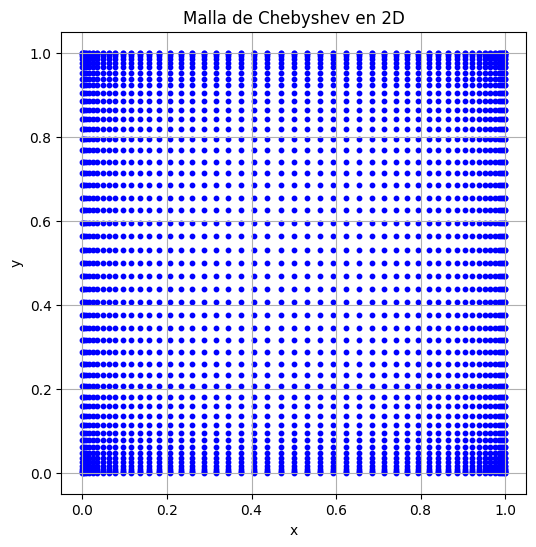

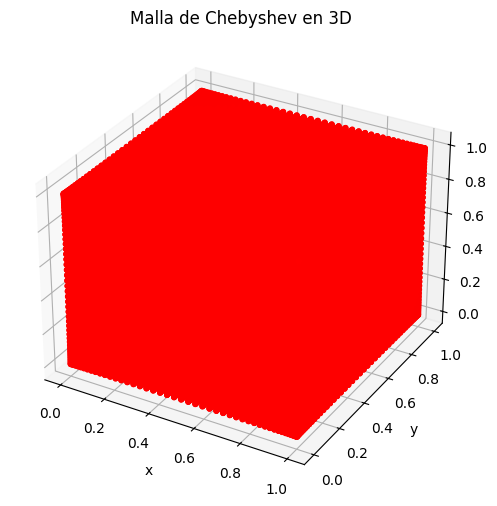

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def chebyshev_nodes(n):
    k = np.arange(n + 1)
    q = np.cos(np.pi * k / n)
    x = (q + 1) / 2  # Mapeo a [0,1]
    return x

# Número de nodos
n = 50
nodes = chebyshev_nodes(n)

# Crear la malla en 2D
X, Y = np.meshgrid(nodes, nodes)

# Visualización en 2D
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, color='blue', s=10)
plt.title("Malla de Chebyshev en 2D")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Crear la malla en 3D
X3D, Y3D, Z3D = np.meshgrid(nodes, nodes, nodes)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3D, Y3D, Z3D, color='red', s=10)
ax.set_title("Malla de Chebyshev en 3D")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


In [ ]:
# Función para evaluar un TensorTrain en índices discretos
def evaluate_tt(tt, indices):
    """
    Evalúa un TensorTrain en un conjunto de índices discretos, usando la estructura de núcleos TT.

    Args:
        tt (TensorTrain): Tensor en formato TT.
        indices (numpy.ndarray): Arreglo de índices de forma (num_samples, d) con valores enteros en [0, n-1].

    Returns:
        numpy.ndarray: Valores evaluados en los índices.
    """
    d = len(tt.dims)  # Número de dimensiones
    n_samples = indices.shape[0]
    result = np.zeros(n_samples)

    for i in range(n_samples):
        # Extraer los índices para esta muestra
        idx = indices[i]

        # Inicializar el valor para esta muestra
        value = np.ones(1)  # Comenzar con 1 (rango inicial r_0 = 1)

        # Iterar sobre cada dimensión y núcleo
        for k in range(d):
            core = tt.cores[k]  # Núcleo de forma (r_{k-1}, n_k, r_k)
            r_prev, n_k, r_next = core.shape
            idx_k = idx[k]  # Índice actual

            # Extraer la matriz correspondiente al índice idx_k
            matrix = core[:, idx_k, :]  # Forma (r_{k-1}, r_k)

            # Multiplicar por la matriz actual
            value = np.dot(value, matrix)

        result[i] = value[0]  # Tomar el valor escalar (r_d = 1)

    return result

# Nueva función para comparar tt_approx con el tensor original
def compare_tt_approx(tt_approx, index_fun, n, d, N_checks=500):
    """
    Compara un Tensor-Train aproximado con la función original en N_checks índices aleatorios.

    Args:
        tt_approx: TensorTrain object (aproximación)
        index_fun: Función que representa el tensor original
        n: Número de nodos por dimensión
        d: Número de dimensiones
        N_checks: Número de índices aleatorios a comprobar (default: 500)

    Returns:
        error_mean: Promedio del error absoluto
    """
    # Generar N_checks índices aleatorios
    random_indices = np.random.randint(0, n, size=(N_checks, d))

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = evaluate_tt(tt_approx, random_indices)

    # Calcular errores absolutos
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el error promedio
    error_mean = np.mean(absolute_errors)

    # Mostrar resultados en pantalla
    print(f"\nComparación de tt_approx con el tensor original en {N_checks} índices aleatorios:")
    print(f"Error absoluto promedio: {error_mean:.6e}")
    print(f"Error absoluto máximo: {np.max(absolute_errors):.6e}")
    print(f"Error absoluto mínimo: {np.min(absolute_errors):.6e}")

    return error_mean

In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular, index_function_wrapper

# Definir la función compleja modificada con conteo interno
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones

    def __call__(self, indices):
        # Mapear índices enteros (0 a n-1) a valores reales en [0, 1]
        indices_real = indices.astype(float) / (self.n - 1)  # Escalar a [0, 1]
        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        #print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(indices_real, self.n)

    def get_total_evaluations(self):
        return self.total_evaluations

# Nueva función más complicada (continua, modificada)
def complex_index_fun_2_continuous_modified(x, n=50):
    """
    Evalúa una función compleja continua modificada en variables reales x_k ∈ [0, 1],
    con variación suave en cada dimensión, valores en el rango aproximado de 0 a 10,
    y sin oscilaciones rápidas.

    Args:
        x (numpy.ndarray): Arreglo de forma (d,) o (num_samples, d) con valores reales en [0, 1].
        n (int): Parámetro de escala (fijo en 50 para consistencia con la original).

    Returns:
        numpy.ndarray: Valor(es) evaluado(s) de la función, en el rango aproximado de 0 a 10.
    """
    # Asegurar que x tenga la forma correcta
    if len(x.shape) == 1:
        x = x.reshape(1, -1)  # Convertir a (1, d) si es un vector
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Las dimensiones deben ser 10")

    # Extraer variables continuas
    x0, x1, x2, x3, x4, x5, x6, x7, x8, x9 = x[:, 0], x[:, 1], x[:, 2], x[:, 3], \
                                               x[:, 4], x[:, 5], x[:, 6], x[:, 7], \
                                               x[:, 8], x[:, 9]

    # Escalar a valores originales (n * x_k), manteniendo variación suave
    # 1. Término exponencial suave en x0, rango [2, 7]
    exp_term = 2 + 5 * (1 - x0)  # Decaimiento lineal suave, rango [2, 7]

    # 2. Término seno con frecuencia baja y amplitud controlada en x1, rango [0, 2]
    sin_term_1 = 1 * np.sin(1 * x1)  # Frecuencia baja (1), amplitud 1

    # 3. Término seno con frecuencia baja y amplitud controlada en x2, rango [0, 2]
    sin_term_2 = 1 * np.sin(1 * x2)  # Frecuencia baja (1), amplitud 1

    # 4. Término coseno suave en x3, rango [-1, 1]
    cos_term_3 = 1 * np.cos(1 * x3)  # Frecuencia baja (1), amplitud 1

    # 5. Término coseno suave en x4, rango [-1, 1]
    cos_term_4 = 1 * np.cos(1 * x4)  # Frecuencia baja (1), amplitud 1

    # 6. Término cuadrático suave en x5, rango [0, 1]
    quad_term_5 = 1 * x5**2  # Cuadrático suave, rango [0, 1]

    # 7. Término cuadrático suave en x6, rango [0, 1]
    quad_term_6 = 1 * x6**2  # Cuadrático suave, rango [0, 1]

    # 8. Término cuadrático suave en x7, rango [0, 1]
    quad_term_7 = 1 * x7**2  # Cuadrático suave, rango [0, 1]

    # 9. Término lineal en x8, rango [0, 1]
    linear_term_8 = 1 * x8  # Lineal suave, rango [0, 1]

    # 10. Término logarítmico suave en x9, rango [0, 1]
    log_term_9 = 1 * np.log1p(1 * x9)  # Logaritmo suave, rango [0, 1]

    # Combinar todos los términos, normalizando para mantener el rango aproximado de 0 a 10
    result = (exp_term + sin_term_1 + sin_term_2 + cos_term_3 + cos_term_4 +
              quad_term_5 + quad_term_6 + quad_term_7 + linear_term_8 + log_term_9)

    # Asegurarnos de que los valores estén aproximadamente en el rango de 0 a 10
    result = np.clip(result, 0, 10)  # Limitar valores entre 0 y 10

    return result.squeeze() if num_samples == 1 else result

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun_2_continuous_modified)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor (usando nodos equiespaciados o ajustados a n=50)
d = 10  # 10 dimensiones
n = 50  # Número de puntos por dimensión (0 a 49)
shape = [n] * d  # Usamos n puntos por dimensión (índices de 0 a n-1)

# Crear un tensor TT inicial con rangos más altos
initial_rank = 10
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n, 1))
    else:
        cores.append(np.random.rand(initial_rank, n, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross Regular
tol = 1e-4
max_its = 10
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,  # Usar la función envuelta correctamente
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación
error_avg = compare_tt_approx(tt_approx, complex_index_fun_2_continuous_modified, n, d, N_checks=1000)

Sweep 0, direction LR. 
Last error: 1.4495e-01
Sweep 1, direction RL. 
Last error: 1.0528e-01
Sweep 2, direction LR. 
Last error: 5.1907e-02
Sweep 3, direction RL. 
Last error: 4.1311e-02
Sweep 4, direction LR. 
Last error: 7.9539e-03
Sweep 5, direction RL. 
Last error: 5.8577e-02

Número total de índices evaluados en todas las llamadas: 246200

Comparación de tt_approx con el tensor original en 1000 índices aleatorios:
Error absoluto promedio: 1.440750e+00
Error absoluto máximo: 7.787800e+00
Error absoluto mínimo: 0.000000e+00


In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular, index_function_wrapper

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    """
    Genera nodos de Chebyshev en el intervalo [0, 1] para n+1 puntos.

    Args:
        n (int): Número de intervalos, generando n+1 nodos (k_i = 0, 1, ..., n).

    Returns:
        numpy.ndarray: Arreglo de nodos de Chebyshev mapeados a [0, 1].
    """
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    print(f"Nodos de Chebyshev para n={n}: {x}")
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    """
    Genera nodos equiespaciados en el intervalo [0, 1] para n+1 puntos.

    Args:
        n (int): Número de intervalos, generando n+1 nodos.

    Returns:
        numpy.ndarray: Arreglo de nodos equiespaciados en [0, 1].
    """
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        """
        Evalúa la función en índices enteros (0 a n) mapeados a nodos de Chebyshev.

        Args:
            indices (numpy.ndarray): Arreglo de índices enteros de forma (num_samples, d) con valores en [0, n].

        Returns:
            numpy.ndarray: Valores evaluados en los nodos de Chebyshev.
        """
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        # Depuración: Mostrar algunos puntos mapeados
        if num_samples > 0:
            print(f"Puntos de Chebyshev para primeros 5 índices en dim 0: {cheb_points[:5, 0]}")
            print(f"Índices correspondientes (primeros 5): {indices[:5, 0]}")

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total
        #print(f"Evaluando {num_evaluations} índices en este llamado. Total acumulado: {self.total_evaluations}")
        return self.func(cheb_points, self.n)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para evaluar un TensorTrain en índices discretos (0 a n)
def evaluate_tt(tt, indices):
    """
    Evalúa un TensorTrain en un conjunto de índices discretos, usando la estructura de núcleos TT.

    Args:
        tt (TensorTrain): Tensor en formato TT.
        indices (numpy.ndarray): Arreglo de índices de forma (num_samples, d) con valores enteros en [0, n].

    Returns:
        numpy.ndarray: Valores evaluados en los índices.
    """
    d = len(tt.dims)  # Número de dimensiones
    n_samples = indices.shape[0]
    result = np.zeros(n_samples)

    for i in range(n_samples):
        # Extraer los índices para esta muestra (ajustados a [0, n])
        idx = indices[i]

        # Inicializar el valor para esta muestra
        value = np.ones(1)  # Comenzar con 1 (rango inicial r_0 = 1)

        # Iterar sobre cada dimensión y núcleo
        for k in range(d):
            core = tt.cores[k]  # Núcleo de forma (r_{k-1}, n_k, r_k)
            r_prev, n_k, r_next = core.shape
            idx_k = idx[k]  # Índice actual (0 a n)

            # Verificar que el índice esté dentro del rango
            if idx_k >= n_k:
                raise ValueError(f"Índice {idx_k} fuera del rango [0, {n_k-1}] en dimensión {k}")

            # Extraer la matriz correspondiente al índice idx_k
            matrix = core[:, idx_k, :]  # Forma (r_{k-1}, r_k)

            # Multiplicar por la matriz actual
            value = np.dot(value, matrix)

        result[i] = value[0]  # Tomar el valor escalar (r_d = 1)

    # Depuración: Mostrar algunos valores evaluados
    if n_samples > 0:
        print(f"Valores aproximados en primeros 5 índices: {result[:5]}")

    return result

# Nueva función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    """
    Compara un Tensor-Train aproximado con la función original en N_checks nodos de Chebyshev aleatorios.

    Args:
        tt_approx: TensorTrain object (aproximación)
        index_fun: Función que representa el tensor original
        n: Número de nodos por dimensión (generando n+1 nodos)
        d: Número de dimensiones
        N_checks: Número de nodos de Chebyshev aleatorios a comprobar (default: 1000)

    Returns:
        error_mean: Promedio del error absoluto
    """
    # Generar nodos de Chebyshev para cada dimensión
    cheb_nodes = chebyshev_nodes(n)

    # Generar N_checks índices aleatorios en [0, n] para nodos de Chebyshev
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)  # Usar choice para distribución uniforme
    print(f"Índices aleatorios Chebyshev (primeros 5): {random_indices[:5]}")

    # Calcular valores exactos en nodos de Chebyshev
    exact_values = index_fun(random_indices)

    # Calcular valores aproximados en nodos de Chebyshev
    approx_values = evaluate_tt(tt_approx, random_indices)

    # Depuración: Mostrar algunos puntos y valores
    print(f"Valores exactos en nodos de Chebyshev (primeros 5): {exact_values[:5]}")
    print(f"Valores aproximados en nodos de Chebyshev (primeros 5): {approx_values[:5]}")

    # Calcular errores absolutos en nodos de Chebyshev
    absolute_errors_chebyshev = np.abs(exact_values - approx_values)

    # Calcular el error promedio en nodos de Chebyshev
    error_mean_chebyshev = np.mean(absolute_errors_chebyshev)

    # Generar N_checks nodos equiespaciados para comparación
    equi_nodes = equispaced_nodes(n)
    equi_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)  # Índices 0 a n para nodos equiespaciados
    print(f"Índices equiespaciados (primeros 5): {equi_indices[:5]}")

    # Calcular valores exactos en nodos equiespaciados
    equi_points = np.zeros((N_checks, d))
    for i in range(d):
        equi_points[:, i] = equi_nodes[equi_indices[:, i]]
    exact_values_equi = index_fun(equi_indices)

    # Calcular valores aproximados en nodos equiespaciados
    approx_values_equi = evaluate_tt(tt_approx, equi_indices)

    # Depuración: Mostrar algunos puntos y valores en nodos equiespaciados
    print(f"Valores exactos en nodos equiespaciados (primeros 5): {exact_values_equi[:5]}")
    print(f"Valores aproximados en nodos equiespaciados (primeros 5): {approx_values_equi[:5]}")

    # Calcular errores absolutos en nodos equiespaciados
    absolute_errors_equi = np.abs(exact_values_equi - approx_values_equi)

    # Calcular el error promedio en nodos equiespaciados
    error_mean_equi = np.mean(absolute_errors_equi)

    # Mostrar resultados en pantalla
    print(f"\nComparación de tt_approx con el tensor original en {N_checks} nodos de Chebyshev:")
    print(f"Error absoluto promedio (Chebyshev): {error_mean_chebyshev:.6e}")
    print(f"Error absoluto máximo (Chebyshev): {np.max(absolute_errors_chebyshev):.6e}")
    print(f"Error absoluto mínimo (Chebyshev): {np.min(absolute_errors_chebyshev):.6e}")

    print(f"\nComparación de tt_approx con el tensor original en {N_checks} nodos equiespaciados:")
    print(f"Error absoluto promedio (Equiespaciados): {error_mean_equi:.6e}")
    print(f"Error absoluto máximo (Equiespaciados): {np.max(absolute_errors_equi):.6e}")
    print(f"Error absoluto mínimo (Equiespaciados): {np.min(absolute_errors_equi):.6e}")

    return error_mean_chebyshev, error_mean_equi

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(complex_index_fun_2_continuous_simplified)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor (usando nodos de Chebyshev)
d = 10  # 10 dimensiones
n = 50  # Número de intervalos, generando n+1 nodos (0 a 50)
shape = [n + 1] * d  # Usamos n+1 puntos por dimensión (índices de 0 a n)

# Crear un tensor TT inicial con rangos más altos
initial_rank = 10  # Aumentar rango inicial para capturar mejor la función
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n + 1, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n + 1, 1))
    else:
        cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross Regular
tol = 1e-3  # Relajar tolerancia para más iteraciones
max_its = 30  # Aumentar iteraciones para convergencia
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,  # Usar la función envuelta correctamente
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación en nodos de Chebyshev y equiespaciados
error_avg_cheb, error_avg_equi = compare_tt_approx_chebyshev(tt_approx, complex_index_fun_2_continuous_simplified, n, d, N_checks=1000)

Nodos de Chebyshev para n=50: [1.00000000e+00 9.99013364e-01 9.96057351e-01 9.91143625e-01
 9.84291581e-01 9.75528258e-01 9.64888243e-01 9.52413526e-01
 9.38153340e-01 9.22163963e-01 9.04508497e-01 8.85256621e-01
 8.64484314e-01 8.42273553e-01 8.18711995e-01 7.93892626e-01
 7.67913397e-01 7.40876837e-01 7.12889646e-01 6.84062276e-01
 6.54508497e-01 6.24344944e-01 5.93690657e-01 5.62666617e-01
 5.31395260e-01 5.00000000e-01 4.68604740e-01 4.37333383e-01
 4.06309343e-01 3.75655056e-01 3.45491503e-01 3.15937724e-01
 2.87110354e-01 2.59123163e-01 2.32086603e-01 2.06107374e-01
 1.81288005e-01 1.57726447e-01 1.35515686e-01 1.14743379e-01
 9.54915028e-02 7.78360372e-02 6.18466600e-02 4.75864738e-02
 3.51117571e-02 2.44717419e-02 1.57084194e-02 8.85637464e-03
 3.94264934e-03 9.86635786e-04 0.00000000e+00]
Puntos de Chebyshev para primeros 5 índices en dim 0: [0.02447174 0.53139526 0.99605735 0.28711035 0.25912316]
Índices correspondientes (primeros 5): [45 24  2 32 33]
Puntos de Chebyshev para

# 03/03

<ipython-input-2-29504e1a672d>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[a, b] = custom_function(X_sample)


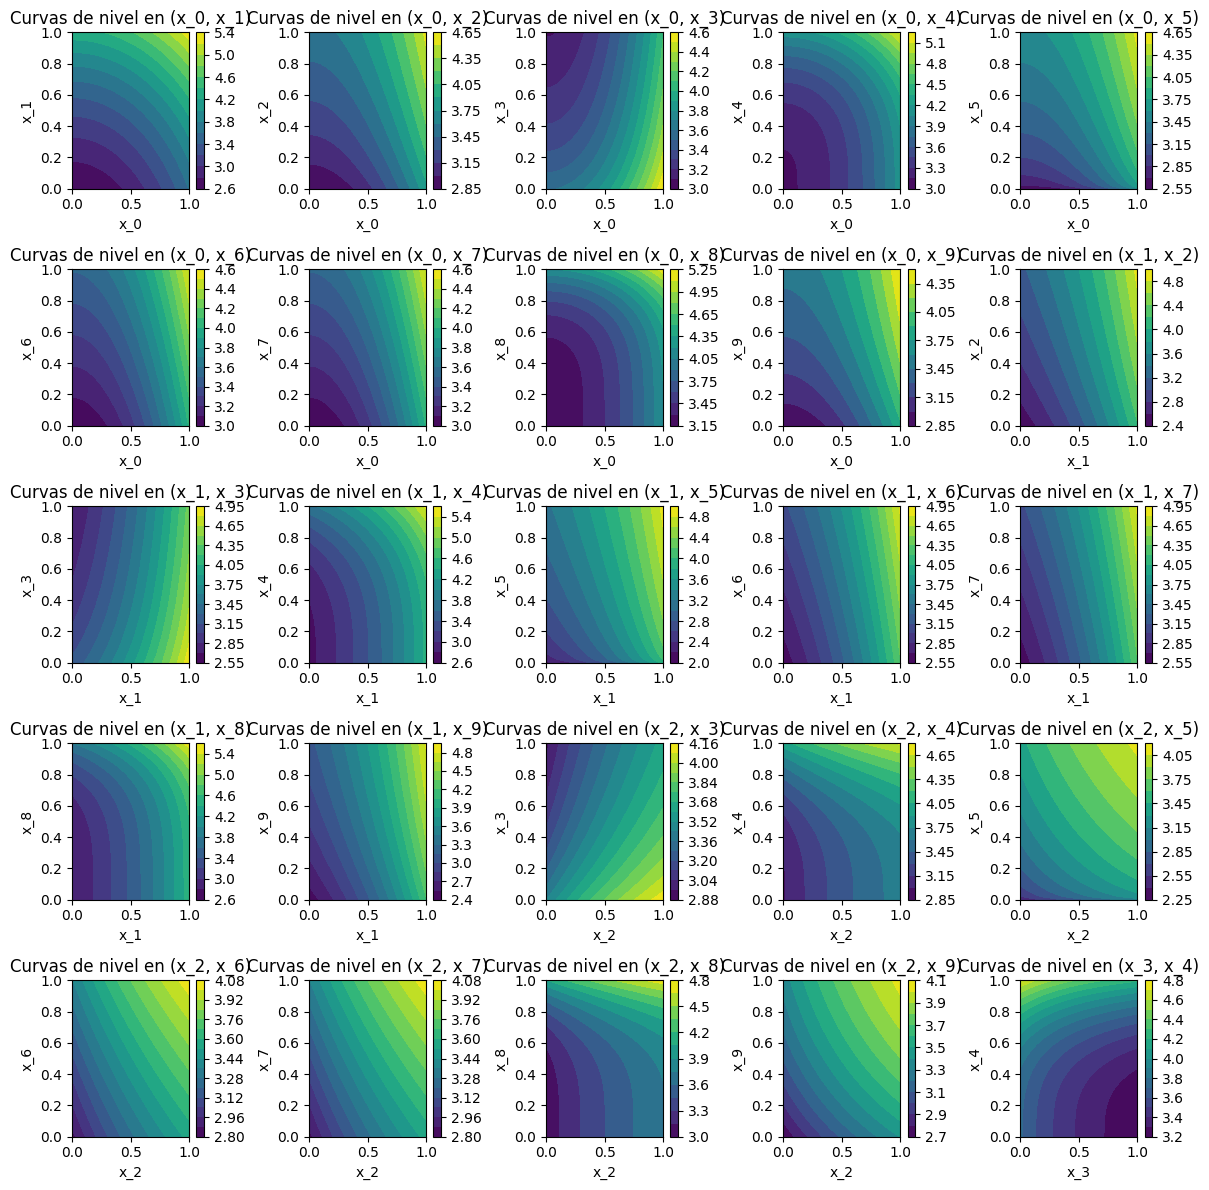

<ipython-input-2-29504e1a672d>:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_vals[j] = custom_function(X_sample)


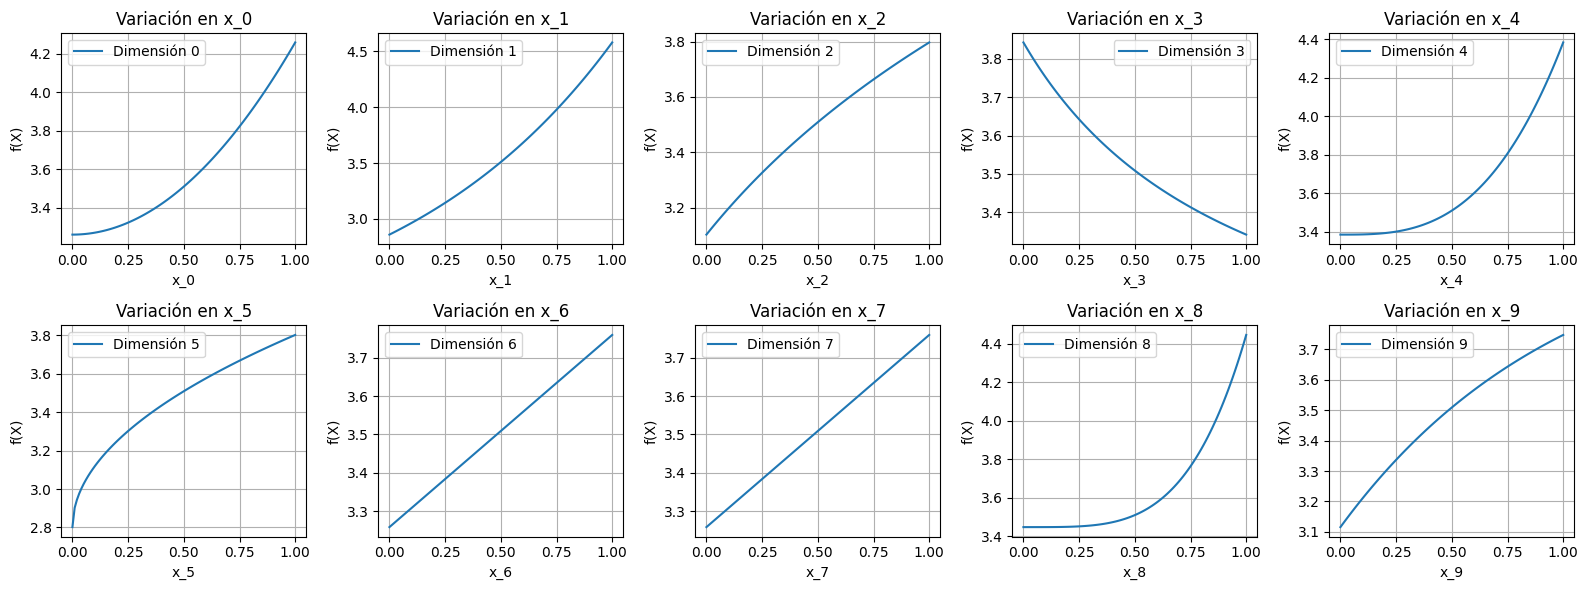

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return (x[:, 0] ** 2 + np.exp(x[:, 1]) + np.log(x[:, 2] + 1) +
            1 / (x[:, 3] + 1) + x[:, 4] ** 3 + np.sqrt(x[:, 5]) +
            x[:, 6] * x[:, 7] + x[:, 8] ** 4 - np.exp(-x[:, 9]))

def plot_contour():
    """
    Visualiza las curvas de nivel de la función en pares de dimensiones.
    """
    n_dim = 10
    x_vals = np.linspace(0, 1, 50)
    y_vals = np.linspace(0, 1, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    fig, axes = plt.subplots(5, 5, figsize=(12, 12))
    axes = axes.flatten()

    index = 0
    for i in range(n_dim):
        for j in range(i+1, n_dim):
            Z = np.zeros_like(X)
            for a in range(X.shape[0]):
                for b in range(X.shape[1]):
                    X_sample = np.full(10, 0.5)
                    X_sample[i] = X[a, b]
                    X_sample[j] = Y[a, b]
                    Z[a, b] = custom_function(X_sample)

            ax = axes[index]
            contour = ax.contourf(X, Y, Z, levels=15, cmap='viridis')
            fig.colorbar(contour, ax=ax)
            ax.set_title(f"Curvas de nivel en (x_{i}, x_{j})")
            ax.set_xlabel(f"x_{i}")
            ax.set_ylabel(f"x_{j}")
            index += 1

            if index >= len(axes):
                break
        if index >= len(axes):
            break

    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
plot_contour()

def plot_slices():
    """
    Visualiza cómo varía la función al modificar cada una de las 10 dimensiones individualmente.
    """
    n_dim = 10
    x_vals = np.linspace(0, 1, 100)

    fig, axes = plt.subplots(2, 5, figsize=(16, 6))
    axes = axes.flatten()

    for i in range(n_dim):
        y_vals = np.zeros_like(x_vals)

        for j, x in enumerate(x_vals):
            X_sample = np.full(10, 0.5)  # Mantener todas las dimensiones en 0.5
            X_sample[i] = x  # Variar solo la dimensión i
            y_vals[j] = custom_function(X_sample)

        ax = axes[i]
        ax.plot(x_vals, y_vals, label=f"Dimensión {i}")
        ax.set_title(f"Variación en x_{i}")
        ax.set_xlabel(f"x_{i}")
        ax.set_ylabel("f(X)")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
plot_slices()

In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular, index_function_wrapper

def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return (x[:, 0] ** 2 + np.exp(x[:, 1]) + np.log(x[:, 2] + 1) +
            1 / (x[:, 3] + 1) + x[:, 4] ** 3 + np.sqrt(x[:, 5]) +
            x[:, 6] * x[:, 7] + x[:, 8] ** 4 - np.exp(-x[:, 9]))

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    #print(f"Nodos de Chebyshev para n={n}: {x}")
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total

        # Llamada corregida a la función sin el segundo argumento innecesario
        return self.func(cheb_points)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para evaluar un TensorTrain en índices discretos (0 a n)
def evaluate_tt(tt, indices):
    d = len(tt.dims)  # Número de dimensiones
    n_samples = indices.shape[0]
    result = np.zeros(n_samples)

    for i in range(n_samples):
        idx = indices[i]
        value = np.ones(1)  # Comenzar con 1 (rango inicial r_0 = 1)

        for k in range(d):
            core = tt.cores[k]
            r_prev, n_k, r_next = core.shape
            idx_k = idx[k]

            if idx_k >= n_k:
                raise ValueError(f"Índice {idx_k} fuera del rango [0, {n_k-1}] en dimensión {k}")

            matrix = core[:, idx_k, :]
            value = np.dot(value, matrix)

        result[i] = value[0]

    return result

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    exact_values = index_fun(random_indices)
    approx_values = evaluate_tt(tt_approx, random_indices)

    absolute_errors_chebyshev = np.abs(exact_values - approx_values)
    error_mean_chebyshev = np.mean(absolute_errors_chebyshev)
    """
    equi_nodes = equispaced_nodes(n)
    equi_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    equi_points = np.zeros((N_checks, d))
    for i in range(d):
        equi_points[:, i] = equi_nodes[equi_indices[:, i]]
    exact_values_equi = index_fun(equi_indices)

    approx_values_equi = evaluate_tt(tt_approx, equi_indices)
    absolute_errors_equi = np.abs(exact_values_equi - approx_values_equi)
    error_mean_equi = np.mean(absolute_errors_equi)
    return error_mean_equi
    """

    return error_mean_chebyshev

In [ ]:
# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor (usando nodos de Chebyshev)
d = 10  # 10 dimensiones
n = 50  # Número de intervalos, generando n+1 nodos (0 a 50)
shape = [n + 1] * d  # Usamos n+1 puntos por dimensión (índices de 0 a n)

# Crear un tensor TT inicial con rangos más altos
initial_rank = 3  # Aumentar rango inicial para capturar mejor la función
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n + 1, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n + 1, 1))
    else:
        cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross Regular
tol = 1e-3  # Relajar tolerancia para más iteraciones
max_its = 2  # Aumentar iteraciones para convergencia
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,  # Usar la función envuelta correctamente
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación en nodos de Chebyshev y equiespaciados
error_avg_cheb = compare_tt_approx_chebyshev(tt_approx, complex_index_fun_with_count, n, d, N_checks=1000)
error_avg_cheb

Sweep 0, direction LR. 
Last error: 4.7804e-29
Sweep 1, direction RL. 
Last error: 5.8620e-30

Número total de índices evaluados en todas las llamadas: 8156


2.4906743334440763e-15

In [ ]:
import numpy as np

# Suponemos que tienes estas funciones definidas
# custom_function: evalúa la función original en puntos de [0,1]
# evaluate_tt: evalúa el TT en índices
# tt_approx: tu tensor TT aproximado

# Parámetros
d = 10  # Número de dimensiones
n = 50  # Número de nodos por dimensión (índices de 0 a 50)
N_checks = 5  # Número de puntos aleatorios para depurar

# Función para generar nodos de Chebyshev (según el estándar [-1,1] mapeado a [0,1])
def chebyshev_nodes(n):
    k = np.arange(n + 1)
    nodes = np.cos((2 * k + 1) * np.pi / (2 * (n + 1)))
    # Mapear de [-1,1] a [0,1]
    return 0.5 * (nodes + 1)

# Generar índices aleatorios
random_indices = np.random.randint(0, n + 1, size=(N_checks, d))

# Obtener nodos de Chebyshev
cheb_nodes = chebyshev_nodes(n)
cheb_points = np.zeros((N_checks, d))
for i in range(d):
    cheb_points[:, i] = cheb_nodes[random_indices[:, i]]

# Evaluar la función original en los puntos de Chebyshev
exact_values = custom_function(cheb_points)

# Evaluar la aproximación TT en los índices correspondientes
approx_values = evaluate_tt(tt_approx, random_indices)

# Mostrar resultados
print("Comparación entre función original y aproximación TT:")
print("-------------------------------------------------")
for i in range(N_checks):
    print(f"Muestra {i + 1}:")
    print(f"  Índices: {random_indices[i]}")
    print(f"  Puntos de Chebyshev: {cheb_points[i]}")
    print(f"  Valor exacto (custom_function): {exact_values[i]}")
    print(f"  Valor aproximado (TT): {approx_values[i]}")
    print(f"  Error absoluto: {np.abs(exact_values[i] - approx_values[i])}")
    print("-------------------------------------------------")

Comparación entre función original y aproximación TT:
-------------------------------------------------
Muestra 1:
  Índices: [ 1 40 19 43 22 50 20 19 23  6]
  Puntos de Chebyshev: [9.97867088e-01 1.00991386e-01 6.80620833e-01 5.24183543e-02
 5.91874759e-01 2.37140143e-04 6.51576337e-01 6.80620833e-01
 5.61444145e-01 9.60452759e-01]
  Valor exacto (custom_function): 3.954224188243438
  Valor aproximado (TT): 3.95422418824344
  Error absoluto: 1.7763568394002505e-15
-------------------------------------------------
Muestra 2:
  Índices: [27 39 12 35 34 37 34 37 42 40]
  Puntos de Chebyshev: [0.43855585 0.12029754 0.85895596 0.21111308 0.23678392 0.16315218
 0.23678392 0.16315218 0.0669873  0.10099139]
  Valor exacto (custom_function): 2.3177731724053836
  Valor aproximado (TT): 2.3177731724053836
  Error absoluto: 0.0
-------------------------------------------------
Muestra 3:
  Índices: [28 26 50 26 18 21 44 22 11  4]
  Puntos de Chebyshev: [4.08125241e-01 4.69219547e-01 2.37140143e-0



---



# 4/03

Hemos comprobado que para la primera función, que llamaremos $f_1$, sí que se obtiene una muy buena aproximación con alrededor de 8000 evaluaciones. Vamos ahora a dibujar la distribución del error (con signo) en las 1000 evaluaciones aleatorias que se hacen para comprobar el desempeño del algoritmo.

**Atención:** Una cosa de la que no me había dado cuenta es que cuando ejecutas el algoritmo con los mismos parámetros varias veces, hay a veces que no llega a un buen error. Es decir, lo ejecutas una vez y se obtiene un error promedio de $10^{-14}$, y lo vuelves a ejecutar sin cambiar nada y obtiene un error promedio de $0.3$. ¿Por qué sucede esto? En principio, debería ser por la inicialización aleatoria del TensorTrain y de las columnas con las que empieza el algoritmo, pero ¿hay alguna manera de hacer el algoritmo más robusto frente a estos fallos?



---



**Primera prueba:**
$$ f_1=x_0^2+e^{x_1}+\log(x_2+1)+\frac{1}{x_3+1}+x_4^3+\sqrt{x_5}+x_6x_7+x_8^4-e^{-x_9}$$

In [ ]:
def custom_function(x):
    """

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return (x[:, 0] ** 2 + np.exp(x[:, 1]) + np.log(x[:, 2] + 1) +
            1 / (x[:, 3] + 1) + x[:, 4] ** 3 + np.sqrt(x[:, 5]) +
            x[:, 6] * x[:, 7] + x[:, 8] ** 4 - np.exp(-x[:, 9]))

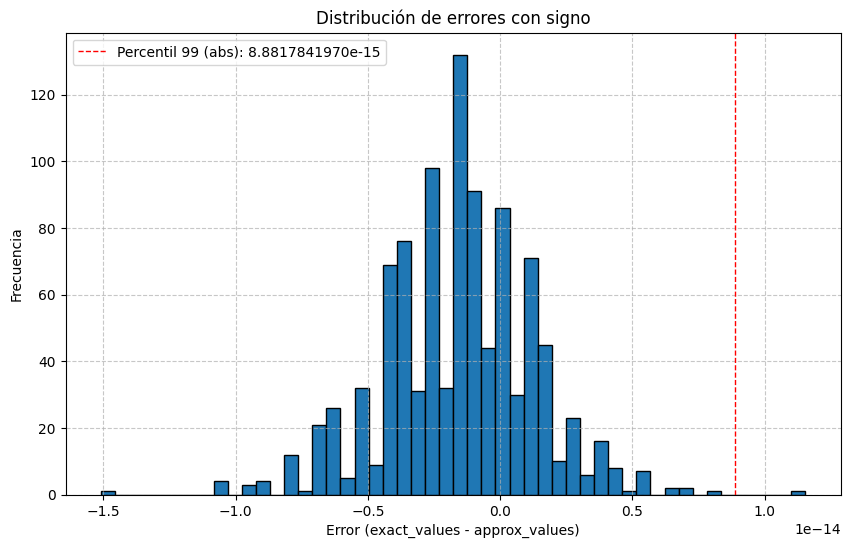

Percentil 99 de los errores absolutos: 8.8817841970e-15
Error medio absoluto en nodos de Chebyshev: 2.5470736631e-15


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = evaluate_tt(tt_approx, random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el histograma de los errores con signo
    num_bins = 50  # Número de bins, ajustable según necesidad
    hist, bin_edges = np.histogram(errors, bins=num_bins)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_99_abs = np.percentile(absolute_errors, 99)

    # Graficar el histograma de errores con signo
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
    plt.title('Distribución de errores con signo')
    plt.xlabel('Error (exact_values - approx_values)')
    plt.ylabel('Frecuencia')
    plt.axvline(percentile_99_abs, color='red', linestyle='dashed', linewidth=1,
                label=f'Percentil 99 (abs): {percentile_99_abs:.10e}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Calcular el error medio absoluto
    error_mean_chebyshev = np.mean(absolute_errors)

    # Imprimir con notación científica y alta precisión
    print(f"Percentil 99 de los errores absolutos: {percentile_99_abs:.10e}")
    print(f"Error medio absoluto en nodos de Chebyshev: {error_mean_chebyshev:.10e}")

    return error_mean_chebyshev

# Llamar a la función de comparación
error_avg_cheb = compare_tt_approx_chebyshev(tt_approx, complex_index_fun_with_count, n, d, N_checks=1000)



---



**Segunda función:**

$$ f_2=x_0^2\cdot x_9^2\cdot x_8^3+e^{-x_1^2+x_5^4-x_7\cdot x_6}+\log(1+x_3+x_2\cdot x_7)+\frac{x_0^2+x_1+x_4}{1+x_5^3+x_2^2+x_8^4}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular, index_function_wrapper


def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2 + x[:, 8] ** 4) )

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    #print(f"Nodos de Chebyshev para n={n}: {x}")
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total

        # Llamada corregida a la función sin el segundo argumento innecesario
        return self.func(cheb_points)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para evaluar un TensorTrain en índices discretos (0 a n)
def evaluate_tt(tt, indices):
    d = len(tt.dims)  # Número de dimensiones
    n_samples = indices.shape[0]
    result = np.zeros(n_samples)

    for i in range(n_samples):
        idx = indices[i]
        value = np.ones(1)  # Comenzar con 1 (rango inicial r_0 = 1)

        for k in range(d):
            core = tt.cores[k]
            r_prev, n_k, r_next = core.shape
            idx_k = idx[k]

            if idx_k >= n_k:
                raise ValueError(f"Índice {idx_k} fuera del rango [0, {n_k-1}] en dimensión {k}")

            matrix = core[:, idx_k, :]
            value = np.dot(value, matrix)

        result[i] = value[0]

    return result

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = evaluate_tt(tt_approx, random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el histograma de los errores con signo
    num_bins = 50  # Número de bins, ajustable según necesidad
    hist, bin_edges = np.histogram(errors, bins=num_bins)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_99_abs = np.percentile(absolute_errors, 99)

    # Graficar el histograma de errores con signo
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
    plt.title('Distribución de errores con signo')
    plt.xlabel('Error (exact_values - approx_values)')
    plt.ylabel('Frecuencia')
    plt.axvline(percentile_99_abs, color='red', linestyle='dashed', linewidth=1,
                label=f'Percentil 99 (abs): {percentile_99_abs:.10e}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Calcular el error medio absoluto
    error_mean_chebyshev = np.mean(absolute_errors)

    # Imprimir con notación científica y alta precisión
    print(f"Percentil 99 de los errores absolutos: {percentile_99_abs:.10e}")
    print(f"Error medio absoluto en nodos de Chebyshev: {error_mean_chebyshev:.10e}")

    return error_mean_chebyshev

Sweep 0, direction LR. 
Last error: 1.5606e-01
Sweep 1, direction RL. 
Last error: 2.2166e-03
Sweep 2, direction LR. 
Last error: 8.3183e-05

Número total de índices evaluados en todas las llamadas: 46100


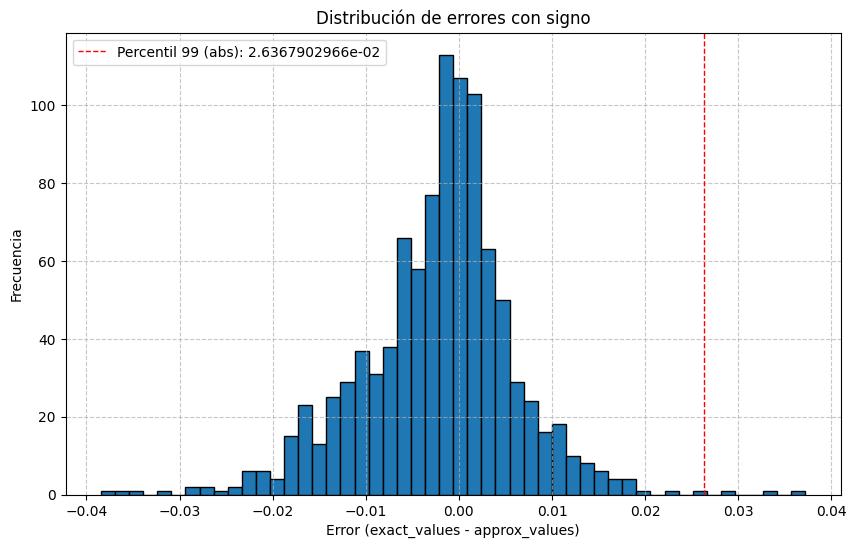

Percentil 99 de los errores absolutos: 2.6367902966e-02
Error medio absoluto en nodos de Chebyshev: 6.1216809799e-03


In [ ]:
# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor (usando nodos de Chebyshev)
d = 10  # 10 dimensiones
n = 50  # Número de intervalos, generando n+1 nodos (0 a 50)
shape = [n + 1] * d  # Usamos n+1 puntos por dimensión (índices de 0 a n)

# Crear un tensor TT inicial con rangos más altos
initial_rank = 6  # Aumentar rango inicial para capturar mejor la función
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n + 1, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n + 1, 1))
    else:
        cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross Regular
tol = 1e-3  # Relajar tolerancia para más iteraciones
max_its = 3  # Aumentar iteraciones para convergencia
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,  # Usar la función envuelta correctamente
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación en nodos de Chebyshev y equiespaciados
# Llamar a la función de comparación
error_avg_cheb = compare_tt_approx_chebyshev(tt_approx, complex_index_fun_with_count, n, d, N_checks=1000)

In [ ]:
import numpy as np

# Suponemos que tienes estas funciones definidas
# custom_function: evalúa la función original en puntos de [0,1]
# evaluate_tt: evalúa el TT en índices
# tt_approx: tu tensor TT aproximado

# Parámetros
d = 10  # Número de dimensiones
n = 50  # Número de nodos por dimensión (índices de 0 a 50)
N_checks = 5  # Número de puntos aleatorios para depurar

# Función para generar nodos de Chebyshev (según el estándar [-1,1] mapeado a [0,1])
def chebyshev_nodes(n):
    k = np.arange(n + 1)
    nodes = np.cos((2 * k + 1) * np.pi / (2 * (n + 1)))
    # Mapear de [-1,1] a [0,1]
    return 0.5 * (nodes + 1)

# Generar índices aleatorios
random_indices = np.random.randint(0, n + 1, size=(N_checks, d))

# Obtener nodos de Chebyshev
cheb_nodes = chebyshev_nodes(n)
cheb_points = np.zeros((N_checks, d))
for i in range(d):
    cheb_points[:, i] = cheb_nodes[random_indices[:, i]]

# Evaluar la función original en los puntos de Chebyshev
exact_values = custom_function(cheb_points)

# Evaluar la aproximación TT en los índices correspondientes
approx_values = evaluate_tt(tt_approx, random_indices)

# Mostrar resultados
print("Comparación entre función original y aproximación TT:")
print("-------------------------------------------------")
for i in range(N_checks):
    print(f"Muestra {i + 1}:")
    print(f"  Índices: {random_indices[i]}")
    print(f"  Puntos de Chebyshev: {cheb_points[i]}")
    print(f"  Valor exacto (custom_function): {exact_values[i]}")
    print(f"  Valor aproximado (TT): {approx_values[i]}")
    print(f"  Error absoluto: {np.abs(exact_values[i] - approx_values[i])}")
    print("-------------------------------------------------")

Comparación entre función original y aproximación TT:
-------------------------------------------------
Muestra 1:
  Índices: [35 50 30 20 14 39 13  2 17 17]
  Puntos de Chebyshev: [2.11113084e-01 2.37140143e-04 3.48423663e-01 6.51576337e-01
 8.13461903e-01 1.20297542e-01 8.36847822e-01 9.94082736e-01
 7.36546778e-01 7.36546778e-01]
  Valor exacto (custom_function): 1.7425938403589902
  Valor aproximado (TT): 1.774468017033353
  Error absoluto: 0.031874176674362875
-------------------------------------------------
Muestra 2:
  Índices: [14  5  9 31 35  0 42 12 47 45]
  Puntos de Chebyshev: [0.8134619  0.97157722 0.91680119 0.31937917 0.21111308 0.99976286
 0.0669873  0.85895596 0.01157584 0.02842278]
  Valor exacto (custom_function): 2.3922403262522285
  Valor aproximado (TT): 2.3938360994289543
  Error absoluto: 0.0015957731767257677
-------------------------------------------------
Muestra 3:
  Índices: [37 36 46 19 23  0 17 13 15  2]
  Puntos de Chebyshev: [0.16315218 0.1865381  0.0

<ipython-input-121-4a82e66e3fb6>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[a, b] = custom_function(X_sample)


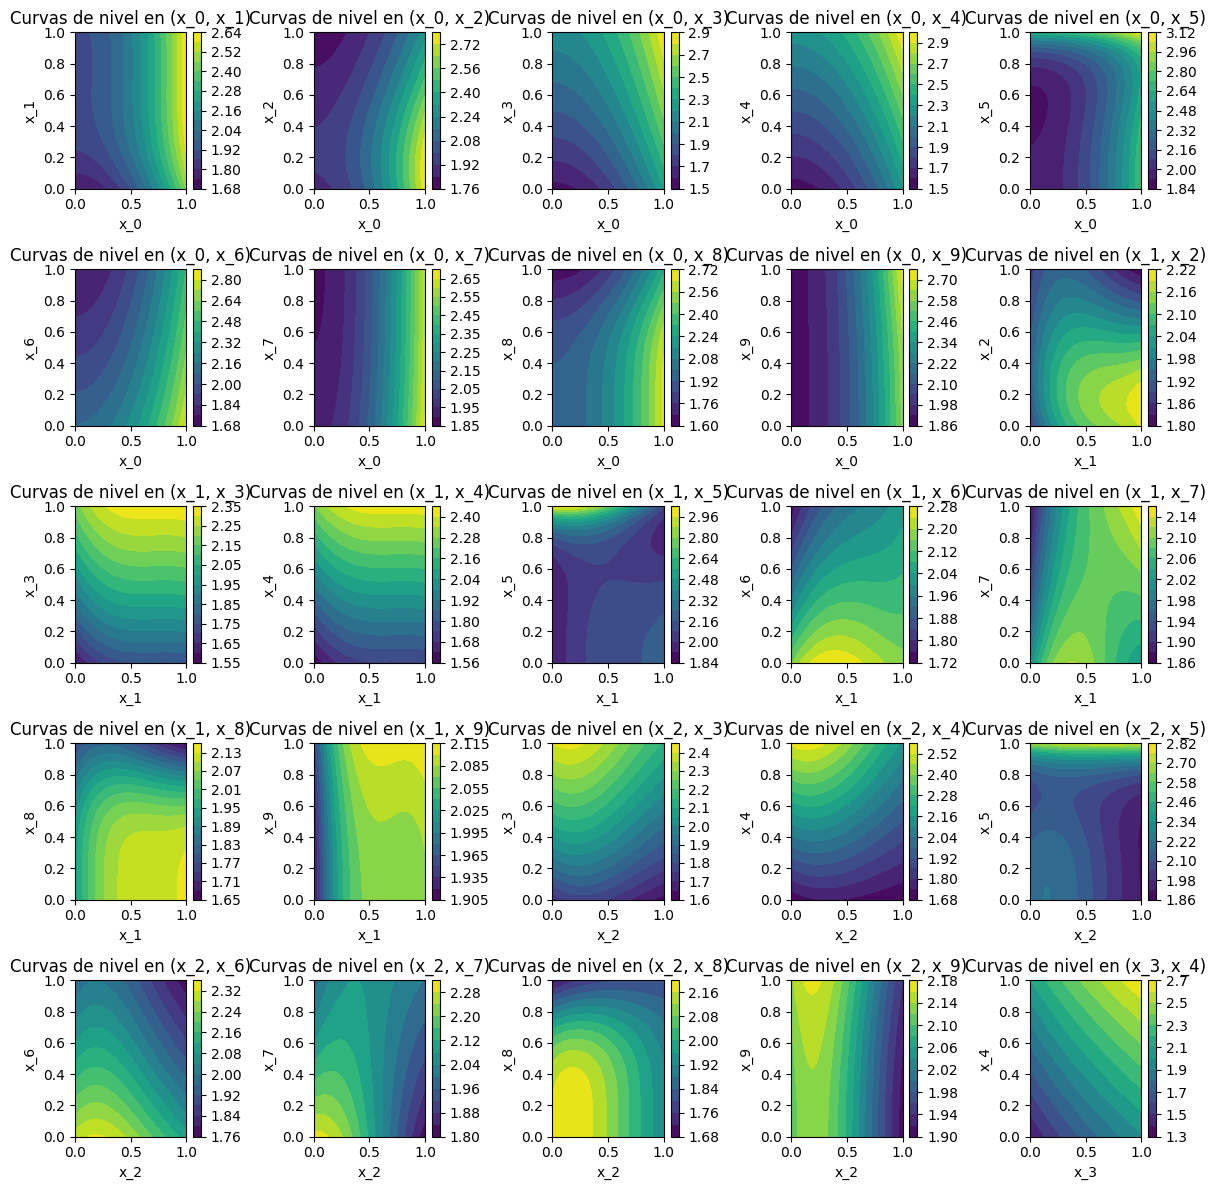

<ipython-input-121-4a82e66e3fb6>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_vals[j] = custom_function(X_sample)


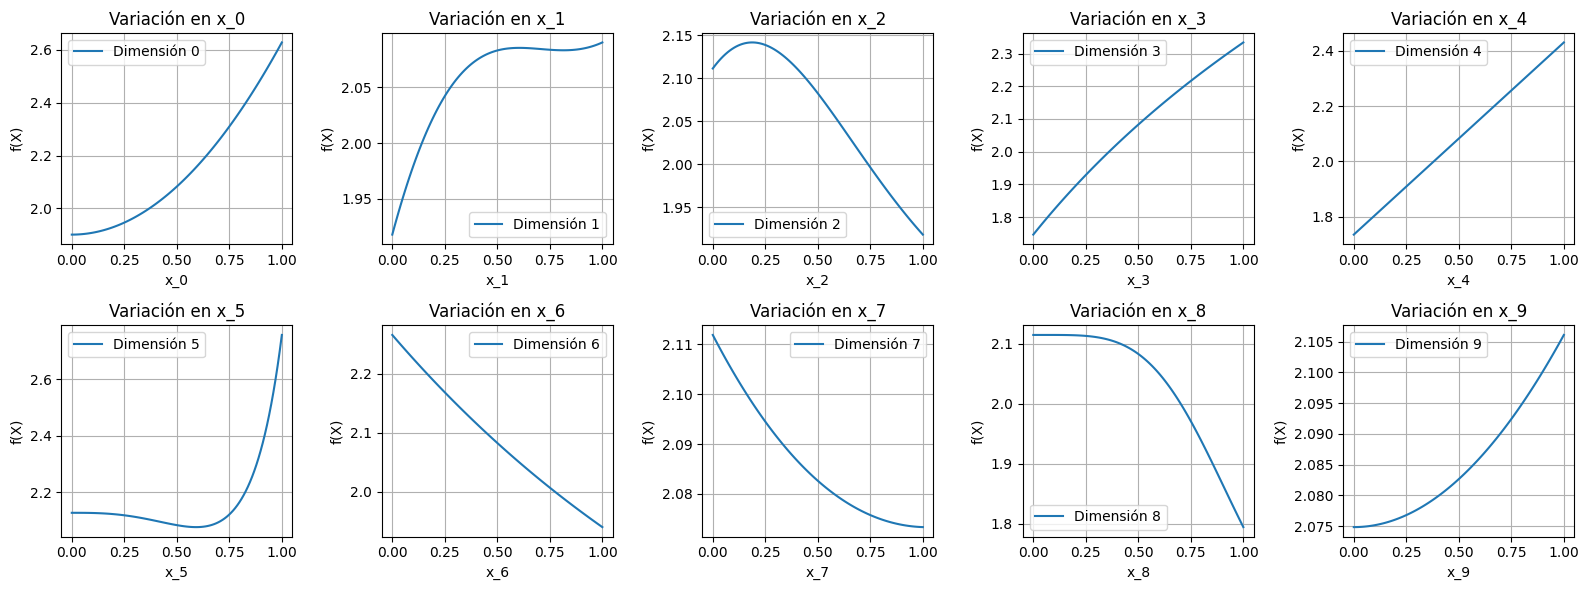

In [ ]:
def plot_contour():
    """
    Visualiza las curvas de nivel de la función en pares de dimensiones.
    """
    n_dim = 10
    x_vals = np.linspace(0, 1, 50)
    y_vals = np.linspace(0, 1, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    fig, axes = plt.subplots(5, 5, figsize=(12, 12))
    axes = axes.flatten()

    index = 0
    for i in range(n_dim):
        for j in range(i+1, n_dim):
            Z = np.zeros_like(X)
            for a in range(X.shape[0]):
                for b in range(X.shape[1]):
                    X_sample = np.full(10, 0.5)
                    X_sample[i] = X[a, b]
                    X_sample[j] = Y[a, b]
                    Z[a, b] = custom_function(X_sample)

            ax = axes[index]
            contour = ax.contourf(X, Y, Z, levels=15, cmap='viridis')
            fig.colorbar(contour, ax=ax)
            ax.set_title(f"Curvas de nivel en (x_{i}, x_{j})")
            ax.set_xlabel(f"x_{i}")
            ax.set_ylabel(f"x_{j}")
            index += 1

            if index >= len(axes):
                break
        if index >= len(axes):
            break

    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
plot_contour()

def plot_slices():
    """
    Visualiza cómo varía la función al modificar cada una de las 10 dimensiones individualmente.
    """
    n_dim = 10
    x_vals = np.linspace(0, 1, 100)

    fig, axes = plt.subplots(2, 5, figsize=(16, 6))
    axes = axes.flatten()

    for i in range(n_dim):
        y_vals = np.zeros_like(x_vals)

        for j, x in enumerate(x_vals):
            X_sample = np.full(10, 0.5)  # Mantener todas las dimensiones en 0.5
            X_sample[i] = x  # Variar solo la dimensión i
            y_vals[j] = custom_function(X_sample)

        ax = axes[i]
        ax.plot(x_vals, y_vals, label=f"Dimensión {i}")
        ax.set_title(f"Variación en x_{i}")
        ax.set_xlabel(f"x_{i}")
        ax.set_ylabel("f(X)")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
plot_slices()

Conclusión: Para $f_2$ no conseguimos una aproximación suficientemente buena para un número razonable de llamadas de la función.

Para rango 10 y número máximo de iteraciones 10, obtiene un percentil 99 del error absoluto del orden de $10^{-4}$, pero con unas 400000 llamadas.



---



**Tercera función:**

Para este tercer intento, vamos a intentar con una función que tenga como mucho 5 variables combinadas en cada término.

$$ f_3=x_0^2\cdot x_9^2\cdot x_8^3+e^{-x_1^2+x_5^4-x_7\cdot x_6}+\log(1+x_3+x_2\cdot x_7)+\frac{x_0^2+x_1+x_4}{1+x_5^3+x_2^2}$$

Sweep 0, direction LR. 
Last error: 6.4243e-02
Sweep 1, direction RL. 
Last error: 9.9081e-03
Sweep 2, direction LR. 
Last error: 5.5567e-03
Sweep 3, direction RL. 
Last error: 9.5160e-03
Sweep 4, direction LR. 
Last error: 2.0206e-03
Sweep 5, direction RL. 
Last error: 2.1032e-03
Sweep 6, direction LR. 
Last error: 2.1145e-03
Sweep 7, direction RL. 
Last error: 6.9292e-04
Sweep 8, direction LR. 
Last error: 1.3115e-03
Sweep 9, direction RL. 
Last error: 1.2924e-03

Número total de índices evaluados en todas las llamadas: 107300


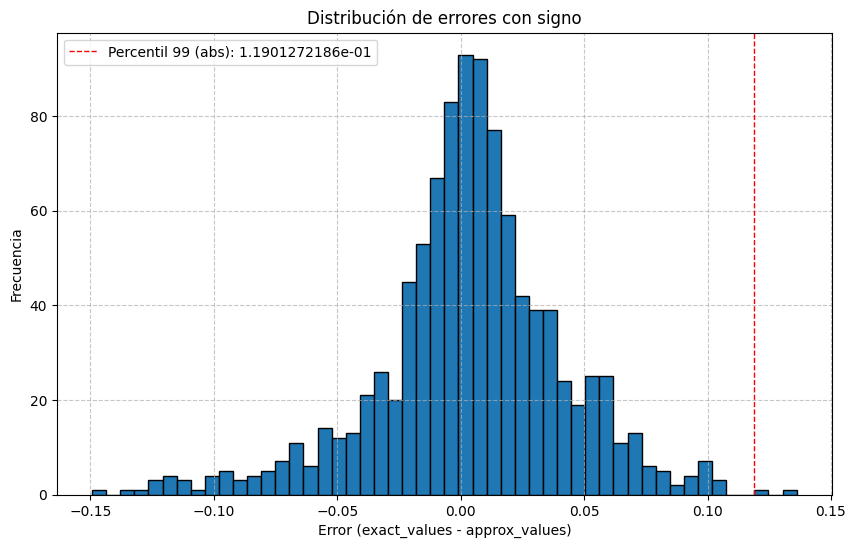

Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.1901272186e-01
Error medio absoluto en nodos de Chebyshev: 2.7634806530e-02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_dmrg, tt_cross_regular, index_function_wrapper

def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2))

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total

        return self.func(cheb_points)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = tt_approx.gather(random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el histograma de los errores con signo
    num_bins = 50
    hist, bin_edges = np.histogram(errors, bins=num_bins)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_99_abs = np.percentile(absolute_errors, 99)

    # Graficar el histograma de errores con signo
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
    plt.title('Distribución de errores con signo')
    plt.xlabel('Error (exact_values - approx_values)')
    plt.ylabel('Frecuencia')
    plt.axvline(percentile_99_abs, color='red', linestyle='dashed', linewidth=1,
                label=f'Percentil 99 (abs): {percentile_99_abs:.10e}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Calcular el error medio absoluto
    error_mean_chebyshev = np.mean(absolute_errors)

    # Imprimir con notación científica y alta precisión
    print(f"Percentil 99 de los errores absolutos en nodos de Chebyshev: {percentile_99_abs:.10e}")
    print(f"Error medio absoluto en nodos de Chebyshev: {error_mean_chebyshev:.10e}")

    # Devolver ambos valores
    return error_mean_chebyshev, percentile_99_abs

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Configurar las dimensiones del tensor (usando nodos de Chebyshev)
d = 10  # 10 dimensiones
n = 50  # Número de intervalos, generando n+1 nodos (0 a 50)
shape = [n + 1] * d  # Usamos n+1 puntos por dimensión (índices de 0 a n)

# Crear un tensor TT inicial con rangos más altos
initial_rank = 5  # Aumentar rango inicial para capturar mejor la función
cores = []
for k in range(d):
    if k == 0:
        cores.append(np.random.rand(1, n + 1, initial_rank))
    elif k == d - 1:
        cores.append(np.random.rand(initial_rank, n + 1, 1))
    else:
        cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
tt_initial = TensorTrain(cores)

# Ejecutar el algoritmo TT-Cross Regular
tol = 1e-5  # Relajar tolerancia para más iteraciones
max_its = 10  # Aumentar iteraciones para convergencia
verbose = True

tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=tol,
    max_its=max_its,
    verbose=verbose,
    inplace=True
)

# Mostrar el número total de elementos evaluados
print(f"\nNúmero total de índices evaluados en todas las llamadas: {complex_index_fun_with_count.get_total_evaluations()}")

# Llamar a la función de comparación
error_avg_cheb = compare_tt_approx_chebyshev(tt_approx, complex_index_fun_with_count, n, d, N_checks=1000)



---



# 5/03
Hoy incorporamos una Grid Search de los parámetros óptimos (tol, max_its, initial_rank) de tal manera que el percentil 99 de los errores absolutos (en N=1000 índices aleatorios) sea lo menor posible, y con el menor número de llamadas a la función posibles

In [ ]:
import numpy as np
import itertools
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_regular, index_function_wrapper
import matplotlib.pyplot as plt

# Suponiendo que tienes estas definiciones
# class ComplexFunctionWithCount:
#     def __init__(self, custom_function, n):
#         self.custom_function = custom_function
#         self.total_evaluations = 0
#         self.n = n
#     def __call__(self, indices):
#         self.total_evaluations += len(indices)
#         return self.custom_function(indices)
#     def get_total_evaluations(self):
#         return self.total_evaluations
# def chebyshev_nodes(n):
#     # Implementación de nodos de Chebyshev
#     pass
# def custom_function(indices):
#     # Tu función personalizada
#     pass

# Rangos de parámetros para la grid search
initial_ranks = [2, 3, 4, 5, 7, 10, 12, 15]
tols = [1e-2, 1e-3, 1e-4]
max_its_list = [3, 5, 10]

# Umbral de precisión para el percentil 99
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6

# Grid search
for initial_rank, tol, max_its in itertools.product(initial_ranks, tols, max_its_list):
    print(f"\nProbando: initial_rank={initial_rank}, tol={tol}, max_its={max_its}")

    # Reiniciar el contador de evaluaciones
    complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
    complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

    # Crear tt_initial con el initial_rank actual
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, initial_rank))
        elif k == d - 1:
            cores.append(np.random.rand(initial_rank, n + 1, 1))
        else:
            cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
    tt_initial = TensorTrain(cores)

    # Ejecutar tt_cross_regular
    tt_approx = tt_cross_regular(
        tt=tt_initial,
        index_fun=complex_index_fun_wrapped,
        tol=tol,
        max_its=max_its,
        verbose=False,
        inplace=True
    )

    # Calcular el percentil 99 y el error medio
    error_mean_chebyshev, percentile_99_abs = compare_tt_approx_chebyshev(
        tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
    )

    # Obtener el número de evaluaciones
    evaluations = complex_index_fun_with_count.get_total_evaluations()

    print(f"Percentil 99: {percentile_99_abs:.2e} | Evaluaciones: {evaluations}")

    # Verificar si cumple con el umbral y si es la mejor opción
    if percentile_99_abs <= precision_threshold and evaluations < min_evaluations:
        min_evaluations = evaluations
        best_params = (initial_rank, tol, max_its)

if best_params:
    print(f"\nMejores parámetros: initial_rank={best_params[0]}, tol={best_params[1]}, max_its={best_params[2]} | Evaluaciones={min_evaluations}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")

Output hidden; open in https://colab.research.google.com to view.

**Grid Search para las tres funciones y comparativa (algoritmo de compleción tensorial TT-Cross en nodos de Chebyshev)**

In [ ]:
import numpy as np
import itertools
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_regular, index_function_wrapper
import matplotlib.pyplot as plt
import pandas as pd
import gc

# Definición de la clase para contar evaluaciones
class ComplexFunctionWithCount:
    def __init__(self, custom_function, n):
        self.custom_function = custom_function
        self.total_evaluations = 0
        self.n = n

    def __call__(self, indices):
        self.total_evaluations += len(indices)
        x = (indices / (self.n - 1))  # Escalar índices al rango [0, 1]
        return self.custom_function(x)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para nodos de Chebyshev (necesaria para compare_tt_approx_chebyshev)
def chebyshev_nodes(n):
    k = np.arange(n)
    return 0.5 * (1 - np.cos(np.pi * k / (n - 1)))

# Función para comparar la aproximación con Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = tt_approx.gather(random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el histograma de los errores con signo
    num_bins = 50
    hist, bin_edges = np.histogram(errors, bins=num_bins)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_99 = np.percentile(absolute_errors, 99)

    # Calcular el error medio absoluto
    error_mean = np.mean(absolute_errors)

    # Devolver ambos valores
    return error_mean, percentile_99

# Definición de las funciones
def f_1(x):
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")
    return (x[:, 0] ** 2 + np.exp(x[:, 1]) + np.log(x[:, 2] + 1) +
            1 / (x[:, 3] + 1) + x[:, 4] ** 3 + np.sqrt(x[:, 5]) +
            x[:, 6] * x[:, 7] + x[:, 8] ** 4 - np.exp(-x[:, 9]))

def f_2(x):
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")
    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2 + x[:, 8] ** 4))

def f_3(x):
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")
    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2))

# Lista de funciones a evaluar
functions = {'f_2': f_2, 'f_3': f_3}

# Rangos de parámetros para la grid search
initial_ranks = [2, 3, 4, 5, 10, 15]
tols = [1e-2, 1e-3, 1e-4]
max_its_list = [3, 5, 10]

# Umbral de precisión para el percentil 99
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

# Lista para almacenar los resultados
results = []

# Grid search optimizado
results = []
for func_name, custom_function in functions.items():
    print(f"\n--- Grid Search para {func_name} ---")

    best_params = None
    min_evaluations = 1e6
    best_percentile_99 = None

    for initial_rank, tol, max_its in itertools.product(initial_ranks, tols, max_its_list):
        print(f"\nProbando: initial_rank={initial_rank}, tol={tol}, max_its={max_its}")

        complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
        complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

        cores = []
        for k in range(d):
            if k == 0:
                cores.append(np.ones((1, n + 1, initial_rank)))  # Inicialización constante
            elif k == d - 1:
                cores.append(np.ones((initial_rank, n + 1, 1)))
            else:
                cores.append(np.ones((initial_rank, n + 1, initial_rank)))
        tt_initial = TensorTrain(cores)

        tt_approx = tt_cross_regular(
            tt=tt_initial,
            index_fun=complex_index_fun_wrapped,
            tol=tol,
            max_its=max_its,
            verbose=False,
            inplace=True
        )

        error_mean_chebyshev, percentile_99_abs = compare_tt_approx_chebyshev(
            tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
        )

        evaluations = complex_index_fun_with_count.get_total_evaluations()

        print(f"Percentil 99: {percentile_99_abs:.2e} | Evaluaciones: {evaluations}")

        if percentile_99_abs <= precision_threshold and evaluations < min_evaluations:
            min_evaluations = evaluations
            best_params = (initial_rank, tol, max_its)
            best_percentile_99 = percentile_99_abs

        # Liberar memoria explícitamente
        gc.collect()

    if best_params:
        results.append({
            'Función': func_name,
            'Parámetros óptimos': best_params,
            'Evaluaciones': min_evaluations,
            'Percentil 99': best_percentile_99
        })
    else:
        results.append({
            'Función': func_name,
            'Parámetros óptimos': 'No encontrado',
            'Evaluaciones': 'N/A',
            'Percentil 99': 'N/A'
        })

df_results = pd.DataFrame(results)
print("\nTabla de resultados finales:")
print(df_results)


--- Grid Search para f_2 ---

Probando: initial_rank=2, tol=0.01, max_its=3
Percentil 99: 1.00e+00 | Evaluaciones: 6708

Probando: initial_rank=2, tol=0.01, max_its=5
Percentil 99: 9.83e-01 | Evaluaciones: 8544

Probando: initial_rank=2, tol=0.01, max_its=10
Percentil 99: 1.03e+00 | Evaluaciones: 8544

Probando: initial_rank=2, tol=0.001, max_its=3
Percentil 99: 9.38e-01 | Evaluaciones: 6708

Probando: initial_rank=2, tol=0.001, max_its=5
Percentil 99: 1.12e+00 | Evaluaciones: 8544

Probando: initial_rank=2, tol=0.001, max_its=10
Percentil 99: 1.09e+00 | Evaluaciones: 8544

Probando: initial_rank=2, tol=0.0001, max_its=3
Percentil 99: 1.00e+00 | Evaluaciones: 6708

Probando: initial_rank=2, tol=0.0001, max_its=5
Percentil 99: 1.07e+00 | Evaluaciones: 8544

Probando: initial_rank=2, tol=0.0001, max_its=10
Percentil 99: 1.01e+00 | Evaluaciones: 8544

Probando: initial_rank=3, tol=0.01, max_its=3
Percentil 99: 8.95e-01 | Evaluaciones: 13134

Probando: initial_rank=3, tol=0.01, max_its=5


In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Usar la misma clase ComplexFunctionWithCount para contar evaluaciones
class ComplexFunctionWithCount:
    def __init__(self, custom_function, n):
        self.custom_function = custom_function
        self.total_evaluations = 0
        self.n = n

    def __call__(self, indices):
        self.total_evaluations += len(indices)
        x = (indices / (self.n - 1))  # Escalar índices al rango [0, 1]
        return self.custom_function(x)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para nodos de Chebyshev (pocos puntos para minimizar evaluaciones)
def chebyshev_nodes(n_points):
    k = np.arange(n_points)
    return 0.5 * (1 - np.cos(np.pi * k / (n_points - 1)))

# Inicialización del tensor TT basada en la función objetivo con pocas evaluaciones
def initialize_tt_with_function(custom_function, d, n, initial_ranks, n_eval_points=10):
    # Verificar que initial_ranks tenga la longitud correcta
    if len(initial_ranks) != d:
        raise ValueError(f"initial_ranks debe tener longitud {d}, pero tiene longitud {len(initial_ranks)}")

    # Usar pocos puntos estratégicos (n_eval_points) por dimensión para minimizar evaluaciones
    nodes = chebyshev_nodes(n_eval_points)
    total_evaluations = 0

    # Crear los núcleos del TT, asignando rangos más altos a dimensiones relevantes
    # Para f_2 y f_3, asumimos que x_0, x_8, x_9 son más relevantes
    relevant_dims = [0, 8, 9]  # Dimensiones con mayor contribución
    cores = []

    for k in range(d):
        if k == 0:  # Primera dimensión (x_0, relevante)
            # Evaluar la función en pocos puntos de Chebyshev
            x_points = nodes
            values = custom_function(x_points)  # Evalúa f en n_eval_points puntos
            total_evaluations += n_eval_points
            # Crear núcleo con rango inicial alto (por ejemplo, initial_ranks[0])
            core = np.ones((1, n + 1, initial_ranks[0])) * values[:, np.newaxis, np.newaxis]
            cores.append(core)
        elif k in relevant_dims[1:]:  # Otras dimensiones relevantes (x_8, x_9)
            x_points = nodes
            values = custom_function(x_points)
            total_evaluations += n_eval_points
            # Asegúrate de que el rango de entrada sea correcto (initial_ranks[k-1])
            core = np.ones((initial_ranks[k-1], n + 1, initial_ranks[k])) * values[:, np.newaxis, np.newaxis]
            cores.append(core)
        else:  # Dimensiones menos relevantes (rango bajo, inicialización constante)
            core = np.ones((initial_ranks[k-1], n + 1, initial_ranks[k])) * 0.5  # Valor constante en [0, 1]
            cores.append(core)
        if k == d - 1:  # Última dimensión, ajustar rango de salida a 1
            cores[-1] = np.ones((initial_ranks[d-2], n + 1, 1)) * 0.5

    print(f"Evaluaciones usadas para inicialización: {total_evaluations}")
    # Verificar dimensiones de los núcleos antes de crear TensorTrain
    for i, core in enumerate(cores):
        print(f"Núcleo {i} shape: {core.shape}")

    tt_initial = TensorTrain(cores)
    return tt_initial, total_evaluations

# Ejemplo de uso dentro de tu grid search
d = 10
n = 50
initial_ranks = [10, 2, 2, 2, 2, 2, 2, 2, 10, 1]  # Rangos más altos para x_0, x_8, x_9
n_eval_points = 10  # Usar solo 10 puntos por dimensión para minimizar evaluaciones

# Supongamos que estamos trabajando con f_2
custom_function = f_2
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

# Inicializar el TT con la función objetivo usando pocas evaluaciones
tt_initial, init_evaluations = initialize_tt_with_function(custom_function, d, n, initial_ranks, n_eval_points=n_eval_points)

print(f"Evaluaciones iniciales para crear tt_initial: {init_evaluations}")

# Luego usar tt_initial en tt_cross_regular
tt_approx = tt_cross_regular(
    tt=tt_initial,
    index_fun=complex_index_fun_wrapped,
    tol=1e-4,  # Ajusta según necesites
    max_its=15,  # Ajusta según necesites
    verbose=False,
    inplace=True
)

# Contar evaluaciones totales (inicialización + tt_cross_regular)
total_evaluations = complex_index_fun_with_count.get_total_evaluations() + init_evaluations
print(f"Evaluaciones totales: {total_evaluations}")

Evaluaciones usadas para inicialización: 30
Núcleo 0 shape: (1, 51, 10)
Núcleo 1 shape: (10, 51, 2)
Núcleo 2 shape: (2, 51, 2)
Núcleo 3 shape: (2, 51, 2)
Núcleo 4 shape: (2, 51, 2)
Núcleo 5 shape: (2, 51, 2)
Núcleo 6 shape: (2, 51, 2)
Núcleo 7 shape: (2, 51, 2)
Núcleo 8 shape: (2, 51, 10)
Núcleo 9 shape: (10, 51, 1)
Evaluaciones iniciales para crear tt_initial: 30
Evaluaciones totales: 43070


# Adaptive rank strategy
En esta estrategia, se van incrementando los rangos de uno en uno, pero para todos los cores por igual.



---



# Function tt_cross_regular with new stop criterium

In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2))

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total

        return self.func(cheb_points)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = tt_approx.gather(random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_90_abs = np.percentile(absolute_errors, 90)
    percentile_99_abs = np.percentile(absolute_errors, 99)

    # Calcular el error medio absoluto
    error_mean_chebyshev = np.mean(absolute_errors)

    # Imprimir con notación científica y alta precisión

    print(f"Percentil 90 de los errores absolutos en nodos de Chebyshev: {percentile_90_abs:.10e}")
    print(f"Percentil 99 de los errores absolutos en nodos de Chebyshev: {percentile_99_abs:.10e}")
    print(f"Error medio absoluto en nodos de Chebyshev: {error_mean_chebyshev:.10e}")

    # Devolver ambos valores
    return error_mean_chebyshev, percentile_90_abs, percentile_99_abs

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

In [ ]:
from ttml.tt_cross import random_idx, _init_tt_cross, _sweep_step_regular, _test_accuracy_tt

def tt_cross_regular_v2(
    tt, index_fun, tol_flattening=1e-2, tol_precision=1e-3, max_its=10, verbose=False, inplace=True
):
    """
    Implements DMRG TT-Cross algorithm

    Recovers a tensor-train from a function mapping indices to numbers. The
    function `index_fun` should accept arbitrary multidimensional arrays of
    indices, with last axis the same shape as the number of dimensions. You can
    use `index_function_wrapper` to convert a function to this form.

    Parameters
    ----------
    tt: TensorTrain
        The tensor-train object to be updated.
    index_fun: function
        Function mapping indices to numerical values.
    tol_flattening: float (default: 1e-2)
        Tolerance for convergence based on error flattening. The algorithm stops
        if after a half-sweep the error does not improve significantly (i.e., the
        last error is greater than (1 - tol_flattening) times the maximum of the
        previous three errors).
    tol_precision: float (default: None)
        Absolute error tolerance. If the last error is less than `tol_precision`,
        the algorithm stops. If None, this criterion is ignored.
    max_its: int (default: 10)
        Maximum number of iterations (sweeps).
    verbose: bool (default: False)
        If True, prints progress information.
    inplace: bool (default: True)
        If True, modifies the input tensor-train in place; otherwise, returns a copy.

    Returns
    -------
    tt: TensorTrain
        The updated tensor-train object with computed errors stored in tt.errors.
    stop_reason: str
        Reason for stopping: 'flattening', 'precision', or 'max_iterations'.
    iterations_completed: int
        Number of iterations (sweeps) completed before stopping.
    """
    if not inplace:
        tt = tt.copy()
    tt, Pmats, index_array = _init_tt_cross(tt)
    direction = "LR"
    if tol_flattening is not None or tol_precision is not None:
        cache = dict()
        cache["inds"] = random_idx(tt, 200)
        cache["func_vals"] = index_fun(cache["inds"]).reshape(-1)

    errors = []
    stop_reason = "max_iterations"  # Default stop reason
    iterations_completed = 0

    for j in range(max_its):
        if direction == "LR":  # Left-right sweep
            for i in range(len(tt)):
                _sweep_step_regular(
                    i,
                    "LR",
                    tt,
                    index_array,
                    index_fun,
                    Pmats,  # cache=cache
                )
            if tol_flattening is not None or tol_precision is not None:
                errors.append(_test_accuracy_tt(tt, cache))
            direction = "RL"
        else:  # Right-left sweep
            for i in range(len(tt) - 1, -1, -1):
                _sweep_step_regular(
                    i,
                    "RL",
                    tt,
                    index_array,
                    index_fun,
                    Pmats,  # cache=cache
                )
            if tol_flattening is not None or tol_precision is not None:
                errors.append(_test_accuracy_tt(tt, cache))
            direction = "LR"
        iterations_completed = j + 1  # Contar la iteración actual (0-based, así que sumamos 1)
        if verbose:
            print(f"Sweep {j}, direction {direction[::-1]}. ")
            if len(errors) > 0:
                print(f"Last error: {errors[-1]:.4e}")

        # Check for convergence based on flattening or precision
        if len(errors) > 0:
            # Stop if error is below tol_precision
            if tol_precision is not None and errors[-1] < tol_precision:
                if verbose:
                    print(f"Stopping due to precision criterion: error {errors[-1]:.4e} < {tol_precision}")
                stop_reason = "precision"
                break
            # Stop if error flattens according to tol_flattening
            if tol_flattening is not None and len(errors) > 3:
                if errors[-1] > (1 - tol_flattening) * np.max(errors[-4:-1]):
                    if verbose:
                        print(f"Stopping due to flattening criterion: error {errors[-1]:.4e} > {(1 - tol_flattening) * np.max(errors[-4:-1]):.4e}")
                    stop_reason = "flattening"
                    break

    tt.orthogonalize()
    tt.errors = np.array(errors)
    return tt, stop_reason, iterations_completed

In [ ]:
import numpy as np
import itertools
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_regular, index_function_wrapper, random_idx, _init_tt_cross, _sweep_step_regular, _test_accuracy_tt
import matplotlib.pyplot as plt

# Rangos de parámetros para la grid search
initial_ranks = [7, 8, 9, 10, 11, 12, 13, 15]
tol_flattening_values = [1e-2, 1e-3]  # Renombrado de tols a tol_flattening_values para claridad
max_its_list = [20]

# Umbral de precisión para el percentil 99
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6

# Grid search
for initial_rank, tol_flattening, max_its in itertools.product(initial_ranks, tol_flattening_values, max_its_list):
    print(f"\nProbando: initial_rank={initial_rank}, tol_flattening={tol_flattening}, max_its={max_its}")

    # Reiniciar el contador de evaluaciones
    complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
    complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

    # Crear tt_initial con el initial_rank actual
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, initial_rank))
        elif k == d - 1:
            cores.append(np.random.rand(initial_rank, n + 1, 1))
        else:
            cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
    tt_initial = TensorTrain(cores)

    # Ejecutar tt_cross_regular_v2 con tol_precision fijo en 1e-3 y capturar el motivo de parada y las iteraciones
    tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
        tt=tt_initial,
        index_fun=complex_index_fun_wrapped,
        tol_flattening=tol_flattening,
        tol_precision=1e-3,  # Fijo según tu solicitud
        max_its=max_its,
        verbose=False,
        inplace=True
    )

    # Calcular el percentil 99 y el error medio
    error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
        tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
    )

    # Obtener el número de evaluaciones
    evaluations = complex_index_fun_with_count.get_total_evaluations()

    # Mostrar resultados, incluyendo el motivo de parada, las iteraciones completadas, y el último error si para por precisión
    print(f"Percentil 90: {percentile_90_abs:.2e} | Percentil 99: {percentile_99_abs:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason} | Iteraciones completadas: {iterations_completed}")
    if stop_reason == "precision" and hasattr(tt_approx, 'errors') and len(tt_approx.errors) > 0:
        print(f"Último error que provocó la parada por precisión: {tt_approx.errors[-1]:.4e}")

    # Verificar si cumple con el umbral y si es la mejor opción
    if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
        min_evaluations = evaluations
        best_params = (initial_rank, tol_flattening, max_its)

if best_params:
    print(f"\nMejores parámetros: initial_rank={best_params[0]}, tol_flattening={best_params[1]}, max_its={best_params[2]} | Evaluaciones={min_evaluations}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando: initial_rank=7, tol_flattening=0.01, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.3588195451e-02
Percentil 99 de los errores absolutos en nodos de Chebyshev: 2.4741339346e-02
Error medio absoluto en nodos de Chebyshev: 5.5644851612e-03
Percentil 90: 1.36e-02 | Percentil 99: 2.47e-02 | Evaluaciones: 42612 | Motivo de parada: precision | Iteraciones completadas: 2
Último error que provocó la parada por precisión: 6.3399e-05

Probando: initial_rank=7, tol_flattening=0.001, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 6.9254606672e-03
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.5169837602e-02
Error medio absoluto en nodos de Chebyshev: 2.8905599953e-03
Percentil 90: 6.93e-03 | Percentil 99: 1.52e-02 | Evaluaciones: 63318 | Motivo de parada: precision | Iteraciones completadas: 3
Último error que provocó la parada por precisión: 1.6470e-05

Probando: initial_rank=8, tol_flattening=0.01, max_its=20
Percenti

Esta era la $f_3$. Ahora voy con la $f_2$.

In [ ]:
def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2 + x[:, 8] ** 4) )

import numpy as np
import itertools
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_regular, index_function_wrapper, random_idx, _init_tt_cross, _sweep_step_regular, _test_accuracy_tt
import matplotlib.pyplot as plt

# Suponiendo que tienes estas definiciones
# class ComplexFunctionWithCount:
#     def __init__(self, custom_function, n):
#         self.custom_function = custom_function
#         self.total_evaluations = 0
#         self.n = n
#     def __call__(self, indices):
#         self.total_evaluations += len(indices)
#         return self.custom_function(indices)
#     def get_total_evaluations(self):
#         return self.total_evaluations
# def chebyshev_nodes(n):
#     # Implementación de nodos de Chebyshev
#     pass
# def compare_tt_approx_chebyshev(tt_approx, complex_index_fun_with_count, n, d, N_checks):
#     # Implementación para calcular el percentil 99 y el error medio
#     pass
# def custom_function(indices):
#     # Tu función personalizada
#     pass

# Rangos de parámetros para la grid search
initial_ranks = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
tol_flattening_values = [1e-2, 1e-3]  # Renombrado de tols a tol_flattening_values para claridad
max_its_list = [20]

# Umbral de precisión para el percentil 99
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6

# Grid search
for initial_rank, tol_flattening, max_its in itertools.product(initial_ranks, tol_flattening_values, max_its_list):
    print(f"\nProbando: initial_rank={initial_rank}, tol_flattening={tol_flattening}, max_its={max_its}")

    # Reiniciar el contador de evaluaciones
    complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
    complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

    # Crear tt_initial con el initial_rank actual
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, initial_rank))
        elif k == d - 1:
            cores.append(np.random.rand(initial_rank, n + 1, 1))
        else:
            cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
    tt_initial = TensorTrain(cores)

    # Ejecutar tt_cross_regular_v2 con tol_precision fijo en 1e-3 y capturar el motivo de parada y las iteraciones
    tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
        tt=tt_initial,
        index_fun=complex_index_fun_wrapped,
        tol_flattening=tol_flattening,
        tol_precision=1e-3,  # Fijo según tu solicitud
        max_its=max_its,
        verbose=False,
        inplace=True
    )

    # Calcular el percentil 99 y el error medio
    error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
        tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
    )

    # Obtener el número de evaluaciones
    evaluations = complex_index_fun_with_count.get_total_evaluations()

    # Mostrar resultados, incluyendo el motivo de parada, las iteraciones completadas, y el último error si para por precisión
    print(f"Percentil 90: {percentile_90_abs:.2e} | Percentil 99: {percentile_99_abs:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason} | Iteraciones completadas: {iterations_completed}")
    if stop_reason == "precision" and hasattr(tt_approx, 'errors') and len(tt_approx.errors) > 0:
        print(f"Último error que provocó la parada por precisión: {tt_approx.errors[-1]:.4e}")

    # Verificar si cumple con el umbral y si es la mejor opción
    if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
        min_evaluations = evaluations
        best_params = (initial_rank, tol_flattening, max_its)

if best_params:
    print(f"\nMejores parámetros: initial_rank={best_params[0]}, tol_flattening={best_params[1]}, max_its={best_params[2]} | Evaluaciones={min_evaluations}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando: initial_rank=4, tol_flattening=0.01, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 9.8869945733e-02
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.8212060373e-01
Error medio absoluto en nodos de Chebyshev: 4.2158633622e-02
Percentil 90: 9.89e-02 | Percentil 99: 1.82e-01 | Evaluaciones: 77496 | Motivo de parada: flattening | Iteraciones completadas: 11

Probando: initial_rank=4, tol_flattening=0.001, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 2.4534801231e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 3.8531150127e-01
Error medio absoluto en nodos de Chebyshev: 1.0925989956e-01
Percentil 90: 2.45e-01 | Percentil 99: 3.85e-01 | Evaluaciones: 70560 | Motivo de parada: flattening | Iteraciones completadas: 10

Probando: initial_rank=5, tol_flattening=0.01, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 4.1717015231e-02
Percentil 99 de los errores absolutos en nodos d

Y a continuación la $f_1$.

In [ ]:
def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) + np.exp(x[:, 1]) + np.log(x[:, 2] + 1) + 1 / (x[:, 3] + 1) +
            x[:, 4] ** 3 + np.sqrt(x[:, 5]) + x[:, 6] * x[:, 7] + x[:, 8] ** 4 - np.exp(-x[:, 9]))

import numpy as np
import itertools
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import tt_cross_regular, index_function_wrapper, random_idx, _init_tt_cross, _sweep_step_regular, _test_accuracy_tt
import matplotlib.pyplot as plt

# Suponiendo que tienes estas definiciones
# class ComplexFunctionWithCount:
#     def __init__(self, custom_function, n):
#         self.custom_function = custom_function
#         self.total_evaluations = 0
#         self.n = n
#     def __call__(self, indices):
#         self.total_evaluations += len(indices)
#         return self.custom_function(indices)
#     def get_total_evaluations(self):
#         return self.total_evaluations
# def chebyshev_nodes(n):
#     # Implementación de nodos de Chebyshev
#     pass
# def compare_tt_approx_chebyshev(tt_approx, complex_index_fun_with_count, n, d, N_checks):
#     # Implementación para calcular el percentil 99 y el error medio
#     pass
# def custom_function(indices):
#     # Tu función personalizada
#     pass

# Rangos de parámetros para la grid search
initial_ranks = [2, 3, 4, 5, 6, 7, 8, 9]
tol_flattening_values = [1e-2, 1e-3]  # Renombrado de tols a tol_flattening_values para claridad
max_its_list = [20]

# Umbral de precisión para el percentil 99
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6

# Grid search
for initial_rank, tol_flattening, max_its in itertools.product(initial_ranks, tol_flattening_values, max_its_list):
    print(f"\nProbando: initial_rank={initial_rank}, tol_flattening={tol_flattening}, max_its={max_its}")

    # Reiniciar el contador de evaluaciones
    complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
    complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

    # Crear tt_initial con el initial_rank actual
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, initial_rank))
        elif k == d - 1:
            cores.append(np.random.rand(initial_rank, n + 1, 1))
        else:
            cores.append(np.random.rand(initial_rank, n + 1, initial_rank))
    tt_initial = TensorTrain(cores)

    # Ejecutar tt_cross_regular_v2 con tol_precision fijo en 1e-3 y capturar el motivo de parada y las iteraciones
    tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
        tt=tt_initial,
        index_fun=complex_index_fun_wrapped,
        tol_flattening=tol_flattening,
        tol_precision=1e-3,  # Fijo según tu solicitud
        max_its=max_its,
        verbose=False,
        inplace=True
    )

    # Calcular el percentil 99 y el error medio
    error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
        tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
    )

    # Obtener el número de evaluaciones
    evaluations = complex_index_fun_with_count.get_total_evaluations()

    # Mostrar resultados, incluyendo el motivo de parada, las iteraciones completadas, y el último error si para por precisión
    print(f"Percentil 90: {percentile_90_abs:.2e} | Percentil 99: {percentile_99_abs:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason} | Iteraciones completadas: {iterations_completed}")
    if stop_reason == "precision" and hasattr(tt_approx, 'errors') and len(tt_approx.errors) > 0:
        print(f"Último error que provocó la parada por precisión: {tt_approx.errors[-1]:.4e}")

    # Verificar si cumple con el umbral y si es la mejor opción
    if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
        min_evaluations = evaluations
        best_params = (initial_rank, tol_flattening, max_its)

if best_params:
    print(f"\nMejores parámetros: initial_rank={best_params[0]}, tol_flattening={best_params[1]}, max_its={best_params[2]} | Evaluaciones={min_evaluations}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando: initial_rank=2, tol_flattening=0.01, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 6.6226297927e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 8.7745292578e-01
Error medio absoluto en nodos de Chebyshev: 3.9290524859e-01
Percentil 90: 6.62e-01 | Percentil 99: 8.77e-01 | Evaluaciones: 8544 | Motivo de parada: flattening | Iteraciones completadas: 4

Probando: initial_rank=2, tol_flattening=0.001, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 6.6344241144e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 9.0387336672e-01
Error medio absoluto en nodos de Chebyshev: 4.0677572639e-01
Percentil 90: 6.63e-01 | Percentil 99: 9.04e-01 | Evaluaciones: 8544 | Motivo de parada: flattening | Iteraciones completadas: 4

Probando: initial_rank=3, tol_flattening=0.01, max_its=20
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.2079226508e-13
Percentil 99 de los errores absolutos en nodos de Ch



---



# Adaptive rank strategy
Lo que queremos conseguir en esta sección es incorporar la Adaptive rank strategy del Algoritmo 1 del paper de Low rank tensor approximation de Glau, pero para el TT-Cross en vez de para el Riemannian.

El tema es que el TT Cross usa un TT inicial con un rango predefinido, y no aumenta ese rango en ningún momento. Además, el rango de todos los cores de la aproximación es el mismo. Queremos cambiar eso.

Primero lo haremos para $f_2$, que es la función más "difícil".

In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2 + x[:, 8] ** 4) )

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total

        return self.func(cheb_points)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = tt_approx.gather(random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_90_abs = np.percentile(absolute_errors, 90)
    percentile_99_abs = np.percentile(absolute_errors, 99)

    # Calcular el error medio absoluto
    error_mean_chebyshev = np.mean(absolute_errors)

    # Imprimir con notación científica y alta precisión

    print(f"Percentil 90 de los errores absolutos en nodos de Chebyshev: {percentile_90_abs:.10e}")
    print(f"Percentil 99 de los errores absolutos en nodos de Chebyshev: {percentile_99_abs:.10e}")
    print(f"Error medio absoluto en nodos de Chebyshev: {error_mean_chebyshev:.10e}")

    # Devolver ambos valores
    return error_mean_chebyshev, percentile_90_abs, percentile_99_abs

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

In [ ]:
import numpy as np
import itertools
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d):
    """Crea un tt_initial con los rangos especificados."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, ranks[1]))
        elif k == d - 1:
            cores.append(np.random.rand(ranks[d-1], n + 1, 1))
        else:
            cores.append(np.random.rand(ranks[k], n + 1, ranks[k+1]))
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1] (d+1 elementos porque hay d cores)
    ranks = [1] * (d + 1)
    locked = 0  # Contador de pasos no exitosos
    mu = 1  # Índice del rango TT a modificar (entre 1 y d-1)
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')  # Rastreamos el error medio local

    while locked < d - 1 and max(ranks) < max_rank:
        print(f"  Rango TT actual: {ranks}")

        # Crear tt_initial con los rangos actuales
        tt_initial = create_tt_initial(ranks, n, d)

        # Reiniciar el contador de evaluaciones
        complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
        complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

        # Ejecutar tt_cross_regular_v2
        tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
            tt=tt_initial,
            index_fun=complex_index_fun_wrapped,
            tol_flattening=tol_flattening,
            tol_precision=1e-3,
            max_its=max_its,
            verbose=False,
            inplace=True
        )

        # Evaluar precisión
        error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
            tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
        )
        evaluations = complex_index_fun_with_count.get_total_evaluations()

        print(f"    Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

        # Verificar si mejora la mejor configuración local (basado en error_mean_chebyshev)
        if error_mean_chebyshev < best_local_error_mean:
            best_local_error_mean = error_mean_chebyshev
            best_local_evaluations = evaluations
            best_local_tt_initial = tt_initial
            locked = 0  # Reiniciar locked si hay mejora en error_mean
        else:
            locked += 1  # Incrementar locked si no hay mejora

        # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
        if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
            min_evaluations = evaluations
            best_params = (tol_flattening, max_its)
            best_tt_initial = tt_initial

        # Incrementar el rango del core mu-ésimo
        ranks[mu] += 1
        mu = 1 + (mu % (d - 1))  # Avanzar cíclicamente entre 1 y d-1

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0316892977e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.7121205807e+00
Error medio absoluto en nodos de Chebyshev: 4.8307686108e-01
    Error medio: 4.83e-01 | Evaluaciones: 3240 | Motivo de parada: flattening
  Rango TT actual: [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0732575680e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.6970664981e+00
Error medio absoluto en nodos de Chebyshev: 5.0874833982e-01
    Error medio: 5.09e-01 | Evaluaciones: 3648 | Motivo de parada: flattening
  Rango TT actual: [1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0111374811e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.5980014991e+00
Error medio absoluto en nodos de Chebysh

# Second adaptive rank strategy

Ahora quiero exactamente el mismo algoritmo, pero que en vez de que los rangos se aumenten en una unidad de manera secuencial: $[1, 12, 12, 11, 11, 11, 11, 11, 11, 11, 1] -> [1, 12, 12, 12, 11, 11, 11, 11, 11, 11, 1] -> [1, 12, 12, 12, 12, 12, 11, 11, 11, 11, 1]...$


Quiero que lo hagan aumentando el rango en una unidad, pero en un core aleatorio (teniendo en cuenta que el primer y último rango siempre deben ser 1). El resto del algoritmo quiero que funcione igual.

Atención: Esto permite que por ejemplo ocurra $[1, 2, 2, 1, 1, 3, 3, 1, 2, 4, 1]$, donde hay algún rango es mucho mayor que otros. Quizá queremos que aumenten de manera aleatoria hasta que todos lleguen a la siguiente unidad.

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d):
    """Crea un tt_initial con los rangos especificados."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, ranks[1]))
        elif k == d - 1:
            cores.append(np.random.rand(ranks[d-1], n + 1, 1))
        else:
            cores.append(np.random.rand(ranks[k], n + 1, ranks[k+1]))
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1] (d+1 elementos porque hay d cores)
    ranks = [1] * (d + 1)
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    # Continuar mientras haya algún rango intermedio menor que max_rank
    while any(r < max_rank for r in ranks[1:-1]):
        print(f"  Rango TT actual: {ranks}")

        # Crear tt_initial con los rangos actuales
        tt_initial = create_tt_initial(ranks, n, d)

        # Reiniciar el contador de evaluaciones
        complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
        complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

        # Ejecutar tt_cross_regular_v2
        tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
            tt=tt_initial,
            index_fun=complex_index_fun_wrapped,
            tol_flattening=tol_flattening,
            tol_precision=1e-3,
            max_its=max_its,
            verbose=False,
            inplace=True
        )

        # Evaluar precisión
        error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
            tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
        )
        evaluations = complex_index_fun_with_count.get_total_evaluations()

        print(f"    Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

        # Actualizar el mejor local si hay mejora en error_mean_chebyshev
        if error_mean_chebyshev < best_local_error_mean:
            best_local_error_mean = error_mean_chebyshev
            best_local_evaluations = evaluations
            best_local_tt_initial = tt_initial

        # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
        if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
            min_evaluations = evaluations
            best_params = (tol_flattening, max_its)
            best_tt_initial = tt_initial

        # Seleccionar un core aleatorio (índice entre 1 y d-1) cuyo rango sea menor que max_rank
        possible_cores = [i for i in range(1, d) if ranks[i] < max_rank]
        if possible_cores:
            mu = random.choice(possible_cores)
            ranks[mu] += 1  # Incrementar el rango del core seleccionado

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0056388568e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.6269378285e+00
Error medio absoluto en nodos de Chebyshev: 4.7070837967e-01
    Error medio: 4.71e-01 | Evaluaciones: 3240 | Motivo de parada: flattening
  Rango TT actual: [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0095922342e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.5442730863e+00
Error medio absoluto en nodos de Chebyshev: 4.9020874955e-01
    Error medio: 4.90e-01 | Evaluaciones: 4260 | Motivo de parada: flattening
  Rango TT actual: [1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 9.3451848099e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.6898072457e+00
Error medio absoluto en nodos de Chebysh

Está perfecto. ahora quiero otro enfoque. Quiero que todos los rangos aumenten en una unidad de manera aleatoria, pero hasta el punto en el que todos los rangos tengan el mismo valor.

Es decir, quiero que vayan de $[1,1,...,1,1]$ aumentando aleatoriamente hasta $[1,2,...,2,1]$ y que después sigan aumentando de manera aleatoria hasta $[1,3,...,3,1]$. Después aleatoriamente hasta $[1,max\_rank,...,max\_rank,1]$.

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3, 1e-4]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d):
    """Crea un tt_initial con los rangos especificados."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, ranks[1]))
        elif k == d - 1:
            cores.append(np.random.rand(ranks[d-1], n + 1, 1))
        else:
            cores.append(np.random.rand(ranks[k], n + 1, ranks[k+1]))
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1, 1]
    ranks = [1] * (d + 1)
    current_target = 2  # Comenzamos intentando alcanzar [1, 2, ..., 2, 1]
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    while current_target <= max_rank:
        print(f"  Objetivo actual: todos los rangos intermedios a {current_target}")

        # Continuar hasta que todos los rangos intermedios sean al menos current_target
        while any(r < current_target for r in ranks[1:-1]):
            print(f"    Rango TT actual: {ranks}")

            # Crear tt_initial con los rangos actuales
            tt_initial = create_tt_initial(ranks, n, d)

            # Reiniciar el contador de evaluaciones (suponiendo que existe esta clase)
            complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
            complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

            # Ejecutar tt_cross_regular_v2 (suponiendo que esta función existe)
            tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
                tt=tt_initial,
                index_fun=complex_index_fun_wrapped,
                tol_flattening=tol_flattening,
                tol_precision=1e-3,
                max_its=max_its,
                verbose=False,
                inplace=True
            )

            # Evaluar precisión (suponiendo que esta función existe)
            error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
                tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
            )
            evaluations = complex_index_fun_with_count.get_total_evaluations()

            print(f"      Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

            # Actualizar el mejor local si hay mejora en error_mean_chebyshev
            if error_mean_chebyshev < best_local_error_mean:
                best_local_error_mean = error_mean_chebyshev
                best_local_evaluations = evaluations
                best_local_tt_initial = tt_initial

            # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
            if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
                min_evaluations = evaluations
                best_params = (tol_flattening, max_its)
                best_tt_initial = tt_initial

            # Seleccionar un core aleatorio cuyo rango sea menor que current_target
            possible_cores = [i for i in range(1, d) if ranks[i] < current_target]
            if possible_cores:
                mu = random.choice(possible_cores)
                ranks[mu] += 1  # Incrementar el rango del core seleccionado

        # Una vez que todos los rangos intermedios son al menos current_target, aumentar el objetivo
        current_target += 1

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Objetivo actual: todos los rangos intermedios a 2
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 9.9959124624e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.5724751092e+00
Error medio absoluto en nodos de Chebyshev: 4.8116414422e-01
      Error medio: 4.81e-01 | Evaluaciones: 3240 | Motivo de parada: flattening
    Rango TT actual: [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0488696372e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.7280974318e+00
Error medio absoluto en nodos de Chebyshev: 5.0830539566e-01
      Error medio: 5.08e-01 | Evaluaciones: 3648 | Motivo de parada: flattening
    Rango TT actual: [1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 8.0626230823e-01
Percentil 99 de los errores absolutos en nodos de Chebys

De momento, los mejores resultados para $f_2$:

    Rango TT actual: [1, 9, 9, 9, 9, 9, 8, 8, 9, 8, 1]
    Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.8151496608e-03
    Percentil 99 de los errores absolutos en nodos de Chebyshev: 3.4745532878e-03
    Error medio absoluto en nodos de Chebyshev: 8.2222678965e-04
    Error medio: 8.22e-04 | Evaluaciones: 64542 | Motivo de parada: precision

    Rango TT actual: [1, 8, 8, 9, 9, 8, 8, 8, 8, 8, 1]
    Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.2578264863e-03
    Percentil 99 de los errores absolutos en nodos de Chebyshev: 2.0408490505e-03
    Error medio absoluto en nodos de Chebyshev: 5.6009714816e-04
    Error medio: 5.60e-04 | Evaluaciones: 58422 | Motivo de parada: precision

Repetimos el experimento, ya que en este caso la estrategia es aleatoria.

**Atención a esto:**

El criterio para elegir los mejores parámetros es el siguiente:

Los únicos candidatos son aquellos para los que

    error_mean_chebyshev <= precision_threshold

con

    absolute_errors = np.abs(exact_values - approx_values)
    error_mean_chebyshev = np.mean(absolute_errors)

Para

    N_checks = 1000

De entre esos candidatos, se esocoge el que menor número de evaluaciones tiene. ¿Quizá el criterio debería ser con MSE o con alguno de los percentiles?



---



# TT-Cross algorithm to take into account absolute error (not MSE)

Ya que si pongo tol_precision=1e-3 pero se compara con el MSE, que está elevado al cuadrado, podría estar parando antes de tiempo.

In [ ]:
from ttml.tt_cross import random_idx, _init_tt_cross, _sweep_step_regular, _test_accuracy_tt
import numpy as np

def tt_cross_regular_v2(
    tt, index_fun, tol_flattening=1e-2, tol_precision=1e-3, max_its=10, verbose=False, inplace=True
):
    """
    Implements DMRG TT-Cross algorithm

    Recovers a tensor-train from a function mapping indices to numbers. The
    function `index_fun` should accept arbitrary multidimensional arrays of
    indices, with last axis the same shape as the number of dimensions. You can
    use `index_function_wrapper` to convert a function to this form.

    Parameters
    ----------
    tt: TensorTrain
        The tensor-train object to be updated.
    index_fun: function
        Function mapping indices to numerical values.
    tol_flattening: float (default: 1e-2)
        Tolerance for convergence based on error flattening. The algorithm stops
        if after a half-sweep the error does not improve significantly (i.e., the
        last error is greater than (1 - tol_flattening) times the maximum of the
        previous three errors).
    tol_precision: float (default: 1e-3)
        Absolute error tolerance based on the maximum absolute error. If the max
        absolute error is less than `tol_precision`, the algorithm stops. If None,
        this criterion is ignored.
    max_its: int (default: 10)
        Maximum number of iterations (sweeps).
    verbose: bool (default: False)
        If True, prints progress information.
    inplace: bool (default: True)
        If True, modifies the input tensor-train in place; otherwise, returns a copy.

    Returns
    -------
    tt: TensorTrain
        The updated tensor-train object with computed errors stored in tt.errors.
    stop_reason: str
        Reason for stopping: 'flattening', 'precision', or 'max_iterations'.
    iterations_completed: int
        Number of iterations (sweeps) completed before stopping.
    """
    if not inplace:
        tt = tt.copy()
    tt, Pmats, index_array = _init_tt_cross(tt)
    direction = "LR"
    if tol_flattening is not None or tol_precision is not None:
        cache = dict()
        cache["inds"] = random_idx(tt, 200)
        cache["func_vals"] = index_fun(cache["inds"]).reshape(-1)

    errors = []  # Almacena los MSE para el criterio de aplanamiento
    stop_reason = "max_iterations"  # Default stop reason
    iterations_completed = 0

    for j in range(max_its):
        if direction == "LR":  # Left-right sweep
            for i in range(len(tt)):
                _sweep_step_regular(
                    i,
                    "LR",
                    tt,
                    index_array,
                    index_fun,
                    Pmats,
                )
            if tol_flattening is not None or tol_precision is not None:
                # Calcular MSE para el criterio de aplanamiento
                mse = _test_accuracy_tt(tt, cache)
                errors.append(mse)
                # Calcular el error máximo absoluto para el criterio de precisión
                y_pred = tt.gather(cache["inds"])
                y_true = cache["func_vals"]
                max_error = np.max(np.abs(y_pred - y_true))
            direction = "RL"
        else:  # Right-left sweep
            for i in range(len(tt) - 1, -1, -1):
                _sweep_step_regular(
                    i,
                    "RL",
                    tt,
                    index_array,
                    index_fun,
                    Pmats,
                )
            if tol_flattening is not None or tol_precision is not None:
                # Calcular MSE para el criterio de aplanamiento
                mse = _test_accuracy_tt(tt, cache)
                errors.append(mse)
                # Calcular el error máximo absoluto para el criterio de precisión
                y_pred = tt.gather(cache["inds"])
                y_true = cache["func_vals"]
                max_error = np.max(np.abs(y_pred - y_true))
            direction = "LR"
        iterations_completed = j + 1  # Contar la iteración actual (0-based, así que sumamos 1)
        if verbose:
            print(f"Sweep {j}, direction {direction[::-1]}. ")
            if len(errors) > 0:
                print(f"Last MSE: {errors[-1]:.4e}")
                print(f"Last max error: {max_error:.4e}")

        # Check for convergence based on flattening or precision
        if len(errors) > 0:
            # Stop if max error is below tol_precision
            if tol_precision is not None and max_error < tol_precision:
                if verbose:
                    print(f"Stopping due to precision criterion: error {max_error:.4e} < {tol_precision}")
                stop_reason = "precision"
                break
            # Stop if error flattens according to tol_flattening
            if tol_flattening is not None and len(errors) > 3:
                if errors[-1] > (1 - tol_flattening) * np.max(errors[-4:-1]):
                    if verbose:
                        print(f"Stopping due to flattening criterion: MSE {errors[-1]:.4e} > {(1 - tol_flattening) * np.max(errors[-4:-1]):.4e}")
                    stop_reason = "flattening"
                    break

    tt.orthogonalize()
    tt.errors = np.array(errors)  # Almacena los MSE
    return tt, stop_reason, iterations_completed

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d):
    """Crea un tt_initial con los rangos especificados."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, ranks[1]))
        elif k == d - 1:
            cores.append(np.random.rand(ranks[d-1], n + 1, 1))
        else:
            cores.append(np.random.rand(ranks[k], n + 1, ranks[k+1]))
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1, 1]
    ranks = [1] * (d + 1)
    current_target = 2  # Comenzamos intentando alcanzar [1, 2, ..., 2, 1]
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    while current_target <= max_rank:
        print(f"  Objetivo actual: todos los rangos intermedios a {current_target}")

        # Continuar hasta que todos los rangos intermedios sean al menos current_target
        while any(r < current_target for r in ranks[1:-1]):
            print(f"    Rango TT actual: {ranks}")

            # Crear tt_initial con los rangos actuales
            tt_initial = create_tt_initial(ranks, n, d)

            # Reiniciar el contador de evaluaciones (suponiendo que existe esta clase)
            complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
            complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

            # Ejecutar tt_cross_regular_v2 (suponiendo que esta función existe)
            tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
                tt=tt_initial,
                index_fun=complex_index_fun_wrapped,
                tol_flattening=tol_flattening,
                tol_precision=1e-3,
                max_its=max_its,
                verbose=False,
                inplace=True
            )

            # Evaluar precisión (suponiendo que esta función existe)
            error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
                tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
            )
            evaluations = complex_index_fun_with_count.get_total_evaluations()

            print(f"      Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

            # Actualizar el mejor local si hay mejora en error_mean_chebyshev
            if error_mean_chebyshev < best_local_error_mean:
                best_local_error_mean = error_mean_chebyshev
                best_local_evaluations = evaluations
                best_local_tt_initial = tt_initial

            # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
            if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
                min_evaluations = evaluations
                best_params = (tol_flattening, max_its)
                best_tt_initial = tt_initial

            # Seleccionar un core aleatorio cuyo rango sea menor que current_target
            possible_cores = [i for i in range(1, d) if ranks[i] < current_target]
            if possible_cores:
                mu = random.choice(possible_cores)
                ranks[mu] += 1  # Incrementar el rango del core seleccionado

        # Una vez que todos los rangos intermedios son al menos current_target, aumentar el objetivo
        current_target += 1

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Objetivo actual: todos los rangos intermedios a 2
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0031646385e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.8154829153e+00
Error medio absoluto en nodos de Chebyshev: 4.5521879045e-01
      Error medio: 4.55e-01 | Evaluaciones: 3750 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0777583707e+00
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.9099387565e+00
Error medio absoluto en nodos de Chebyshev: 4.5072731342e-01
      Error medio: 4.51e-01 | Evaluaciones: 3648 | Motivo de parada: flattening
    Rango TT actual: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 9.1312117011e-01
Percentil 99 de los errores absolutos en nodos de Chebys

**El criterio de parada dentro de tt_cross_regular_v2:** Con la media del error absoluto o con el máximo de los errores absolutos?

Hay dos criterios de parada de precisión:

*   Uno dentro del algoritmo tt_cross_regular_v2 (tol_precision). Ahora mismo está como: el algoritmo para si el máximo de los errores absolutos en 200 evaluaciones aleatorias es menor que tol_precision.
*   Otro dentro del Grid Search para determinar si esa iteración es candidata a mejores parámetros. Ahora mismo: el algoritmo para si la media de los errores absolutos en 1000 evaluaciones aleatorias es menor que precision_threshold.

Voy a usar exactamente lo mismo pero ahora para $f_3$, a ver si por casualidad necesita menos evaluaciones.

In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2) )

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total

        return self.func(cheb_points)

    def get_total_evaluations(self):
        return self.total_evaluations

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = tt_approx.gather(random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_90_abs = np.percentile(absolute_errors, 90)
    percentile_99_abs = np.percentile(absolute_errors, 99)

    # Calcular el error medio absoluto
    error_mean_chebyshev = np.mean(absolute_errors)

    # Imprimir con notación científica y alta precisión

    print(f"Percentil 90 de los errores absolutos en nodos de Chebyshev: {percentile_90_abs:.10e}")
    print(f"Percentil 99 de los errores absolutos en nodos de Chebyshev: {percentile_99_abs:.10e}")
    print(f"Error medio absoluto en nodos de Chebyshev: {error_mean_chebyshev:.10e}")

    # Devolver ambos valores
    return error_mean_chebyshev, percentile_90_abs, percentile_99_abs

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d):
    """Crea un tt_initial con los rangos especificados."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.random.rand(1, n + 1, ranks[1]))
        elif k == d - 1:
            cores.append(np.random.rand(ranks[d-1], n + 1, 1))
        else:
            cores.append(np.random.rand(ranks[k], n + 1, ranks[k+1]))
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1, 1]
    ranks = [1] * (d + 1)
    current_target = 2  # Comenzamos intentando alcanzar [1, 2, ..., 2, 1]
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    while current_target <= max_rank:
        print(f"  Objetivo actual: todos los rangos intermedios a {current_target}")

        # Continuar hasta que todos los rangos intermedios sean al menos current_target
        while any(r < current_target for r in ranks[1:-1]):
            print(f"    Rango TT actual: {ranks}")

            # Crear tt_initial con los rangos actuales
            tt_initial = create_tt_initial(ranks, n, d)

            # Reiniciar el contador de evaluaciones (suponiendo que existe esta clase)
            complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
            complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

            # Ejecutar tt_cross_regular_v2 (suponiendo que esta función existe)
            tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
                tt=tt_initial,
                index_fun=complex_index_fun_wrapped,
                tol_flattening=tol_flattening,
                tol_precision=1e-3,
                max_its=max_its,
                verbose=False,
                inplace=True
            )

            # Evaluar precisión (suponiendo que esta función existe)
            error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
                tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
            )
            evaluations = complex_index_fun_with_count.get_total_evaluations()

            print(f"      Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

            # Actualizar el mejor local si hay mejora en error_mean_chebyshev
            if error_mean_chebyshev < best_local_error_mean:
                best_local_error_mean = error_mean_chebyshev
                best_local_evaluations = evaluations
                best_local_tt_initial = tt_initial

            # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
            if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
                min_evaluations = evaluations
                best_params = (tol_flattening, max_its)
                best_tt_initial = tt_initial

            # Seleccionar un core aleatorio cuyo rango sea menor que current_target
            possible_cores = [i for i in range(1, d) if ranks[i] < current_target]
            if possible_cores:
                mu = random.choice(possible_cores)
                ranks[mu] += 1  # Incrementar el rango del core seleccionado

        # Una vez que todos los rangos intermedios son al menos current_target, aumentar el objetivo
        current_target += 1

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Objetivo actual: todos los rangos intermedios a 2
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 8.3434920710e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.3659780018e+00
Error medio absoluto en nodos de Chebyshev: 3.9548923843e-01
      Error medio: 3.95e-01 | Evaluaciones: 3750 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 9.5137759604e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.8120785196e+00
Error medio absoluto en nodos de Chebyshev: 4.3543981930e-01
      Error medio: 4.35e-01 | Evaluaciones: 3648 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0034489184e+00
Percentil 99 de los errores absolutos en nodos de Chebys

Para $f_3$ se obtiene aproximadamente $8\times 10^4$ evaluaciones para la mejor elección del rango (se supone que un pelín más sencilla), y para $f_2$ $9\times 10^4$ evaluaciones. **TODO ESTO DEPENDE DE LOS CRITERIOS DE PARADA, REVISAR.**



---



Ahora con los cores iniciales que tengan todo unos en vez de elementos random. Para $f_3$:

In [ ]:
def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2) )

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d, constant_value=1.0):
    """Crea un tt_initial con los rangos especificados y elementos constantes."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.ones((1, n + 1, ranks[1])) * constant_value)
        elif k == d - 1:
            cores.append(np.ones((ranks[d-1], n + 1, 1)) * constant_value)
        else:
            cores.append(np.ones((ranks[k], n + 1, ranks[k+1])) * constant_value)
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1, 1]
    ranks = [1] * (d + 1)
    current_target = 2  # Comenzamos intentando alcanzar [1, 2, ..., 2, 1]
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    while current_target <= max_rank:
        print(f"  Objetivo actual: todos los rangos intermedios a {current_target}")

        # Continuar hasta que todos los rangos intermedios sean al menos current_target
        while any(r < current_target for r in ranks[1:-1]):
            print(f"    Rango TT actual: {ranks}")

            # Crear tt_initial con elementos constantes (todos 1)
            tt_initial = create_tt_initial(ranks, n, d, constant_value=1.0)

            # Reiniciar el contador de evaluaciones (suponiendo que existe esta clase)
            complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
            complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

            # Ejecutar tt_cross_regular_v2 (suponiendo que esta función existe)
            tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
                tt=tt_initial,
                index_fun=complex_index_fun_wrapped,
                tol_flattening=tol_flattening,
                tol_precision=1e-3,
                max_its=max_its,
                verbose=False,
                inplace=True
            )

            # Evaluar precisión (suponiendo que esta función existe)
            error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
                tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
            )
            evaluations = complex_index_fun_with_count.get_total_evaluations()

            print(f"      Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

            # Actualizar el mejor local si hay mejora en error_mean_chebyshev
            if error_mean_chebyshev < best_local_error_mean:
                best_local_error_mean = error_mean_chebyshev
                best_local_evaluations = evaluations
                best_local_tt_initial = tt_initial

            # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
            if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
                min_evaluations = evaluations
                best_params = (tol_flattening, max_its)
                best_tt_initial = tt_initial

            # Seleccionar un core aleatorio cuyo rango sea menor que current_target
            possible_cores = [i for i in range(1, d) if ranks[i] < current_target]
            if possible_cores:
                mu = random.choice(possible_cores)
                ranks[mu] += 1  # Incrementar el rango del core seleccionado

        # Una vez que todos los rangos intermedios son al menos current_target, aumentar el objetivo
        current_target += 1

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Objetivo actual: todos los rangos intermedios a 2
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 8.0202651222e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.4392744602e+00
Error medio absoluto en nodos de Chebyshev: 3.8157437489e-01
      Error medio: 3.82e-01 | Evaluaciones: 3750 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 7.6002967381e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.2124314070e+00
Error medio absoluto en nodos de Chebyshev: 3.5561098691e-01
      Error medio: 3.56e-01 | Evaluaciones: 4872 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 7.0965316792e-01
Percentil 99 de los errores absolutos en nodos de Chebys

Ahora para $f_2$:

In [ ]:
def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2 + x[:, 8] ** 4) )

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d, constant_value=1.0):
    """Crea un tt_initial con los rangos especificados y elementos constantes."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.ones((1, n + 1, ranks[1])) * constant_value)
        elif k == d - 1:
            cores.append(np.ones((ranks[d-1], n + 1, 1)) * constant_value)
        else:
            cores.append(np.ones((ranks[k], n + 1, ranks[k+1])) * constant_value)
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1, 1]
    ranks = [1] * (d + 1)
    current_target = 2  # Comenzamos intentando alcanzar [1, 2, ..., 2, 1]
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    while current_target <= max_rank:
        print(f"  Objetivo actual: todos los rangos intermedios a {current_target}")

        # Continuar hasta que todos los rangos intermedios sean al menos current_target
        while any(r < current_target for r in ranks[1:-1]):
            print(f"    Rango TT actual: {ranks}")

            # Crear tt_initial con elementos constantes (todos 1)
            tt_initial = create_tt_initial(ranks, n, d, constant_value=1.0)

            # Reiniciar el contador de evaluaciones (suponiendo que existe esta clase)
            complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
            complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

            # Ejecutar tt_cross_regular_v2 (suponiendo que esta función existe)
            tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
                tt=tt_initial,
                index_fun=complex_index_fun_wrapped,
                tol_flattening=tol_flattening,
                tol_precision=1e-3,
                max_its=max_its,
                verbose=False,
                inplace=True
            )

            # Evaluar precisión (suponiendo que esta función existe)
            error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
                tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
            )
            evaluations = complex_index_fun_with_count.get_total_evaluations()

            print(f"      Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

            # Actualizar el mejor local si hay mejora en error_mean_chebyshev
            if error_mean_chebyshev < best_local_error_mean:
                best_local_error_mean = error_mean_chebyshev
                best_local_evaluations = evaluations
                best_local_tt_initial = tt_initial

            # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
            if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
                min_evaluations = evaluations
                best_params = (tol_flattening, max_its)
                best_tt_initial = tt_initial

            # Seleccionar un core aleatorio cuyo rango sea menor que current_target
            possible_cores = [i for i in range(1, d) if ranks[i] < current_target]
            if possible_cores:
                mu = random.choice(possible_cores)
                ranks[mu] += 1  # Incrementar el rango del core seleccionado

        # Una vez que todos los rangos intermedios son al menos current_target, aumentar el objetivo
        current_target += 1

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Objetivo actual: todos los rangos intermedios a 2
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 9.9676522894e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.6729706612e+00
Error medio absoluto en nodos de Chebyshev: 4.7538485791e-01
      Error medio: 4.75e-01 | Evaluaciones: 3240 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 7.4214628216e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.4453010639e+00
Error medio absoluto en nodos de Chebyshev: 3.4810606164e-01
      Error medio: 3.48e-01 | Evaluaciones: 3648 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 8.7992401610e-01
Percentil 99 de los errores absolutos en nodos de Chebys

En este caso conseguimos $f_2$ con aprox. $9\times 10^4$ evaluaciones, y $f_2$ con $7\times 10^4$ evaluaciones.



---



# 7/03

Se modifica el algoritmo de TT-Cross para que el criterio de parada con tol_precision sea con el Root Mean Squared Error, en vez de con el máximo de los errores absolutos de la comprobación (por defecto 200 evaluaciones aleatorias).

In [ ]:
from ttml.tt_cross import random_idx, _init_tt_cross, _sweep_step_regular, _test_accuracy_tt
import numpy as np

def tt_cross_regular_v2(
    tt, index_fun, tol_flattening=1e-2, tol_precision=1e-3, max_its=10, verbose=False, inplace=True
):
    """
    Implements DMRG TT-Cross algorithm with RMSE precision stopping criterion

    Parameters
    ----------
    tt: TensorTrain
        The tensor-train object to be updated.
    index_fun: function
        Function mapping indices to numerical values.
    tol_flattening: float (default: 1e-2)
        Tolerance for convergence based on error flattening.
    tol_precision: float (default: 1e-3)
        Absolute error tolerance based on the root mean squared error (RMSE).
        If the RMSE is less than `tol_precision`, the algorithm stops.
    max_its: int (default: 10)
        Maximum number of iterations (sweeps).
    verbose: bool (default: False)
        If True, prints progress information.
    inplace: bool (default: True)
        If True, modifies the input tensor-train in place; otherwise, returns a copy.

    Returns
    -------
    tt: TensorTrain
        The updated tensor-train object with computed errors stored in tt.errors.
    stop_reason: str
        Reason for stopping: 'flattening', 'precision', or 'max_iterations'.
    iterations_completed: int
        Number of iterations (sweeps) completed before stopping.
    """
    if not inplace:
        tt = tt.copy()
    tt, Pmats, index_array = _init_tt_cross(tt)
    direction = "LR"
    if tol_flattening is not None or tol_precision is not None:
        cache = dict()
        cache["inds"] = random_idx(tt, 200)
        cache["func_vals"] = index_fun(cache["inds"]).reshape(-1)

    errors = []  # Almacena los MSE para el criterio de aplanamiento
    stop_reason = "max_iterations"  # Default stop reason
    iterations_completed = 0

    for j in range(max_its):
        if direction == "LR":
            for i in range(len(tt)):
                _sweep_step_regular(
                    i,
                    "LR",
                    tt,
                    index_array,
                    index_fun,
                    Pmats,
                )
            direction = "RL"
        else:
            for i in range(len(tt) - 1, -1, -1):
                _sweep_step_regular(
                    i,
                    "RL",
                    tt,
                    index_array,
                    index_fun,
                    Pmats,
                )
            direction = "LR"
        iterations_completed = j + 1
        if verbose:
            print(f"Sweep {j}, direction {direction[::-1]}. ")

        if tol_flattening is not None or tol_precision is not None:
            mse = _test_accuracy_tt(tt, cache)
            errors.append(mse)
            y_pred = tt.gather(cache["inds"])
            y_true = cache["func_vals"]
            rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))

            if verbose:
                print(f"Last MSE: {errors[-1]:.4e}")
                print(f"Last RMSE: {rmse:.4e}")

            if tol_precision is not None and rmse < tol_precision:
                if verbose:
                    print(f"Stopping due to precision criterion: RMSE {rmse:.4e} < {tol_precision}")
                stop_reason = "precision"
                break

            if tol_flattening is not None and len(errors) > 3:
                if errors[-1] > (1 - tol_flattening) * np.max(errors[-4:-1]):
                    if verbose:
                        print(f"Stopping due to flattening criterion: MSE {errors[-1]:.4e} > {(1 - tol_flattening) * np.max(errors[-4:-1]):.4e}")
                    stop_reason = "flattening"
                    break

    tt.orthogonalize()
    tt.errors = np.array(errors)
    return tt, stop_reason, iterations_completed

Para $f_2$:

In [ ]:
import numpy as np
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

def custom_function(x):
    """
    Función sin senos ni cosenos con variación completamente distinta en cada dimensión.

    Args:
        x (numpy.ndarray): Vector de 10 dimensiones.

    Returns:
        float: Evaluación de la función.
    """
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    num_samples, d = x.shape
    if d != 10:
        raise ValueError("Se requieren exactamente 10 dimensiones")

    return ((x[:, 0] ** 2) * (x[:, 9] ** 2) * (x[:, 8] ** 3) +
            np.exp(-x[:, 1] ** 2 + x[:, 5] ** 4 - x[:, 7] * x[:, 6]) +
            np.log(1 + x[:, 3] + x[:, 2] * x[:, 7]) +
            (x[:, 0] ** 2 + x[:, 1] + x[:, 4]) /
            (1 + x[:, 5] ** 3 + x[:, 2] ** 2 + x[:, 8] ** 4) )

# Función para generar nodos de Chebyshev en el intervalo [0, 1]
def chebyshev_nodes(n):
    k = np.arange(n + 1)  # Índices 0 a n
    q = np.cos(np.pi * k / n)  # Nodos en [-1, 1]
    x = (q + 1) / 2  # Mapeo a [0, 1]
    return x

# Función para generar nodos equiespaciados en el intervalo [0, 1]
def equispaced_nodes(n):
    return np.linspace(0, 1, n + 1)

# Definir la función compleja simplificada con conteo interno, ajustada para nodos de Chebyshev
class ComplexFunctionWithCount:
    def __init__(self, func, n=50):
        self.func = func
        self.n = n
        self.total_evaluations = 0  # Contador de evaluaciones
        self.cheb_nodes = chebyshev_nodes(n)  # Nodos de Chebyshev para cada dimensión

    def __call__(self, indices):
        # Verificar que los índices estén en el rango [0, n]
        if np.any(indices < 0) or np.any(indices > self.n):
            raise ValueError("Índices fuera del rango [0, n]")

        # Mapear índices enteros a nodos de Chebyshev en [0, 1]
        num_samples, d = indices.shape
        cheb_points = np.zeros((num_samples, d))
        for i in range(d):
            cheb_points[:, i] = self.cheb_nodes[indices[:, i]]

        num_evaluations = indices.shape[0]  # Contar las filas
        self.total_evaluations += num_evaluations  # Acumular total

        return self.func(cheb_points)

    def get_total_evaluations(self):
        return self.total_evaluations

    def reset_evaluations(self):
        self.total_evaluations = 0  # Reiniciar el contador de evaluaciones

# Función para comparar tt_approx con el tensor original en nodos de Chebyshev
def compare_tt_approx_chebyshev(tt_approx, index_fun, n, d, N_checks=1000):
    cheb_nodes = chebyshev_nodes(n)
    random_indices = np.random.choice(n + 1, size=(N_checks, d), replace=True)

    # Calcular valores exactos y aproximados
    exact_values = index_fun(random_indices)
    approx_values = tt_approx.gather(random_indices)

    # Calcular errores con signo (para el histograma)
    errors = exact_values - approx_values

    # Calcular errores absolutos (para percentil 99 y error medio)
    absolute_errors = np.abs(exact_values - approx_values)

    # Calcular el percentil 99 sobre los errores absolutos
    percentile_90_abs = np.percentile(absolute_errors, 90)
    percentile_99_abs = np.percentile(absolute_errors, 99)

    # Calcular el error medio absoluto
    error_mean_chebyshev = np.mean(absolute_errors)

    # Imprimir con notación científica y alta precisión

    print(f"Percentil 90 de los errores absolutos en nodos de Chebyshev: {percentile_90_abs:.10e}")
    print(f"Percentil 99 de los errores absolutos en nodos de Chebyshev: {percentile_99_abs:.10e}")
    print(f"Error medio absoluto en nodos de Chebyshev: {error_mean_chebyshev:.10e}")

    # Devolver ambos valores
    return error_mean_chebyshev, percentile_90_abs, percentile_99_abs

# Envolver la función con contador interno
complex_index_fun_with_count = ComplexFunctionWithCount(custom_function)
complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

En el código siguiente, el rango de los cores se aumenta de manera aleatoria:

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2, 1e-3]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d, constant_value=1.0):
    """Crea un tt_initial con los rangos especificados y elementos constantes."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.ones((1, n + 1, ranks[1])) * constant_value)
        elif k == d - 1:
            cores.append(np.ones((ranks[d-1], n + 1, 1)) * constant_value)
        else:
            cores.append(np.ones((ranks[k], n + 1, ranks[k+1])) * constant_value)
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1, 1]
    ranks = [1] * (d + 1)
    current_target = 2  # Comenzamos intentando alcanzar [1, 2, ..., 2, 1]
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    while current_target <= max_rank:
        print(f"  Objetivo actual: todos los rangos intermedios a {current_target}")

        # Continuar hasta que todos los rangos intermedios sean al menos current_target
        while any(r < current_target for r in ranks[1:-1]):
            print(f"    Rango TT actual: {ranks}")

            # Crear tt_initial con elementos constantes (todos 1)
            tt_initial = create_tt_initial(ranks, n, d, constant_value=1.0)

            # Reiniciar el contador de evaluaciones (suponiendo que existe esta clase)
            complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
            complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

            # Ejecutar tt_cross_regular_v2 (suponiendo que esta función existe)
            tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
                tt=tt_initial,
                index_fun=complex_index_fun_wrapped,
                tol_flattening=tol_flattening,
                tol_precision=1e-3,
                max_its=max_its,
                verbose=False,
                inplace=True
            )

            # Evaluar precisión (suponiendo que esta función existe)
            error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
                tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
            )
            evaluations = complex_index_fun_with_count.get_total_evaluations()

            print(f"      Error medio: {error_mean_chebyshev:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason}")

            # Actualizar el mejor local si hay mejora en error_mean_chebyshev
            if error_mean_chebyshev < best_local_error_mean:
                best_local_error_mean = error_mean_chebyshev
                best_local_evaluations = evaluations
                best_local_tt_initial = tt_initial

            # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
            if error_mean_chebyshev <= precision_threshold and evaluations < min_evaluations:
                min_evaluations = evaluations
                best_params = (tol_flattening, max_its)
                best_tt_initial = tt_initial

            # Seleccionar un core aleatorio cuyo rango sea menor que current_target
            possible_cores = [i for i in range(1, d) if ranks[i] < current_target]
            if possible_cores:
                mu = random.choice(possible_cores)
                ranks[mu] += 1  # Incrementar el rango del core seleccionado

        # Una vez que todos los rangos intermedios son al menos current_target, aumentar el objetivo
        current_target += 1

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
  Objetivo actual: todos los rangos intermedios a 2
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 9.8502506394e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.6711046000e+00
Error medio absoluto en nodos de Chebyshev: 4.7842856154e-01
      Error medio: 4.78e-01 | Evaluaciones: 3240 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 8.2733488255e-01
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.4357401402e+00
Error medio absoluto en nodos de Chebyshev: 3.7222265769e-01
      Error medio: 3.72e-01 | Evaluaciones: 3648 | Motivo de parada: flattening
    Rango TT actual: [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 8.2400750736e-01
Percentil 99 de los errores absolutos en nodos de Chebys

Duda que tengo. Para la nueva estrategia de rango adaptativo, hay que calcular el error para una aproximación y para la siguiente de alguna manera. Restarlos, y si eso es mayor que $-\rho$, entonces locked=locked+1 (revert step). Si no lo es, locked=0, X=X_new y se acepta el paso.

Este error, lo calculo con error_mean_chebyshev (media de los errores absolutos en 1000 evaluaciones) o con el RMSE en 1000 evaluaciones?

In [ ]:
import numpy as np
import itertools
import random
from ttml.tensor_train import TensorTrain
from ttml.tt_cross import index_function_wrapper

# Rangos de parámetros para la grid search
tol_flattening_values = [1e-2]
max_its_list = [20]
max_rank = 15  # Límite máximo para los rangos TT
rho = 1e-3  # Parámetro de aceptación, ajustable según necesidad

# Umbral de precisión para el error medio absoluto en nodos de Chebyshev
precision_threshold = 1e-3

# Parámetros fijos
d = 10
n = 50
N_checks = 1000

best_params = None
min_evaluations = 1e6
best_tt_initial = None

def create_tt_initial(ranks, n, d, constant_value=1.0):
    """Crea un tt_initial con los rangos especificados y elementos constantes."""
    cores = []
    for k in range(d):
        if k == 0:
            cores.append(np.ones((1, n + 1, ranks[1])) * constant_value)
        elif k == d - 1:
            cores.append(np.ones((ranks[d-1], n + 1, 1)) * constant_value)
        else:
            cores.append(np.ones((ranks[k], n + 1, ranks[k+1])) * constant_value)
    return TensorTrain(cores)

# Grid search
for tol_flattening, max_its in itertools.product(tol_flattening_values, max_its_list):
    print(f"\nProbando combinación: tol_flattening={tol_flattening}, max_its={max_its}")

    # Inicializar rangos TT como [1, 1, ..., 1, 1]
    ranks = [7] * (d + 1)
    tt_initial = create_tt_initial(ranks, n, d, constant_value=1.0)

    # Reiniciar el contador de evaluaciones
    complex_index_fun_with_count = ComplexFunctionWithCount(custom_function, n=n)
    complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

    # Ejecutar tt_cross_regular_v2 con tt_initial
    tt_approx, stop_reason, iterations_completed = tt_cross_regular_v2(
        tt=tt_initial,
        index_fun=complex_index_fun_wrapped,
        tol_flattening=tol_flattening,
        tol_precision=1e-3,
        max_its=max_its,
        verbose=False,
        inplace=True
    )

    # Inicializar variables para la estrategia adaptativa
    locked = 0
    mu = 1  # Índice del core a incrementar (1 a d-1)
    best_local_evaluations = 1e6
    best_local_tt_initial = None
    best_local_error_mean = float('inf')

    # Bucle adaptativo
    while locked < d - 1 and max(ranks[1:-1]) < max_rank:
        print(f"    Rango TT actual: {ranks}")

        # Incrementar el rango del core mu-ésimo
        new_ranks = ranks.copy()
        new_ranks[mu] += 1
        tt_approx_new = create_tt_initial(new_ranks, n, d, constant_value=1.0)

        # Reiniciar el contador de evaluaciones para tt_approx_new
        complex_index_fun_with_count.reset_evaluations()
        complex_index_fun_wrapped = index_function_wrapper(complex_index_fun_with_count)

        # Ejecutar tt_cross_regular_v2 con tt_approx_new
        tt_approx_new, stop_reason_new, iterations_completed_new = tt_cross_regular_v2(
            tt=tt_approx_new,
            index_fun=complex_index_fun_wrapped,
            tol_flattening=tol_flattening,
            tol_precision=1e-3,
            max_its=max_its,
            verbose=False,
            inplace=True
        )

        # Calcular errores para tt_approx y tt_approx_new
        error_mean_chebyshev, percentile_90_abs, percentile_99_abs = compare_tt_approx_chebyshev(
            tt_approx, complex_index_fun_with_count, n, d, N_checks=N_checks
        )
        error_mean_chebyshev_new, percentile_90_abs_new, percentile_99_abs_new = compare_tt_approx_chebyshev(
            tt_approx_new, complex_index_fun_with_count, n, d, N_checks=N_checks
        )
        evaluations = complex_index_fun_with_count.get_total_evaluations()

        print(f"      Error medio: {error_mean_chebyshev_new:.2e} | Evaluaciones: {evaluations} | Motivo de parada: {stop_reason_new}")

        # Decidir si aceptar o rechazar el incremento
        if ((error_mean_chebyshev_new - error_mean_chebyshev)/error_mean_chebyshev) > -rho:
            locked += 1  # Revertir (rechazar el incremento)
        else:
            locked = 0  # Aceptar el incremento
            tt_approx = tt_approx_new
            ranks = new_ranks

        # Actualizar el mejor local si hay mejora en error_mean_chebyshev
        if error_mean_chebyshev_new < best_local_error_mean:
            best_local_error_mean = error_mean_chebyshev_new
            best_local_evaluations = evaluations
            best_local_tt_initial = tt_approx_new

        # Actualizar el mejor global si cumple con el umbral y tiene menos evaluaciones
        if error_mean_chebyshev_new <= precision_threshold and evaluations < min_evaluations:
            min_evaluations = evaluations
            best_params = (tol_flattening, max_its)
            best_tt_initial = tt_approx_new

        # Actualizar mu para el siguiente core
        mu = 1 + (mu % (d - 1))

    # Reportar la mejor configuración local
    if best_local_tt_initial is not None:
        print(f"  Mejor local: Error medio={best_local_error_mean:.2e}, Evaluaciones={best_local_evaluations}, Ranks={best_local_tt_initial.tt_rank}")

# Resultados finales
if best_params:
    print(f"\nMejores parámetros globales: tol_flattening={best_params[0]}, max_its={best_params[1]} | Evaluaciones={min_evaluations} | Ranks del mejor tt_initial={best_tt_initial.tt_rank}")
else:
    print("No se encontró una combinación que cumpla con el umbral de precisión.")


Probando combinación: tol_flattening=0.01, max_its=20
    Rango TT actual: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 7.7030353773e-03
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.4370382970e-02
Error medio absoluto en nodos de Chebyshev: 3.3479530264e-03
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.0198915261e-02
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.8543302496e-02
Error medio absoluto en nodos de Chebyshev: 4.5645049874e-03
      Error medio: 4.56e-03 | Evaluaciones: 255568 | Motivo de parada: flattening
    Rango TT actual: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Percentil 90 de los errores absolutos en nodos de Chebyshev: 7.4648782147e-03
Percentil 99 de los errores absolutos en nodos de Chebyshev: 1.2816688802e-02
Error medio absoluto en nodos de Chebyshev: 3.3410805101e-03
Percentil 90 de los errores absolutos en nodos de Chebyshev: 1.6642550713e-02
Percentil 99 de los erro

Así, el algoritmo no funciona bien: no aumenta los rangos lo suficiente como para conseguir una buena aproximación.



---



Hasta aquí se queda este método. Continuar ahora con el Riemannian Gradient Tensor Completion.